In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, auc, recall_score,r2_score
from scipy.stats import chisquare, chi2_contingency

## &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;_Step # 01 Fetch the dataset_

- Extract the data from xls file into Pandas

In [2]:
dt = pd.read_excel('default of credit card clients.xls', header=1)

In [12]:
dt[dt['default payment next month']==1]['PAY_0'].value_counts()/len(defaulters)*100

 0    28.450874
 2    27.787824
 1    18.866787
-1    14.376130
-2     5.500301
 3     3.676914
 4     0.783605
 5     0.195901
 8     0.165763
 7     0.105485
 6     0.090416
Name: PAY_0, dtype: float64

In [13]:
dt[dt['default payment next month']==0]['PAY_0'].value_counts()/len(non_defaulters)*100

 0    54.994864
-1    20.253381
 1    10.426297
-2    10.246533
 2     3.522513
 3     0.333847
 4     0.102722
 5     0.055641
 8     0.034241
 6     0.021400
 7     0.008560
Name: PAY_0, dtype: float64

- View the few rows of data 

In [3]:
dt.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


## &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;_Step # 02 Exploratory data Analysis_

1. How many features are there in the dataset?

In [4]:
dt.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
len(dt.columns)

25

2. How many observation the dataset contains?

In [6]:
len(dt)

30000

**Separate datasets**: <br>
Separate out the __defaulters__ and __non-defaulters__ data from the actual (complete) dataset.

In [9]:
defaulters = dt[dt['default payment next month']==1]
non_defaulters = dt[dt['default payment next month']==0]

### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Features Exploration

- **Balance Limit** 

1. How the __balance limit__ is distributed?

In [8]:
bal_limit = dt['LIMIT_BAL']

In [9]:
bal_limit.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

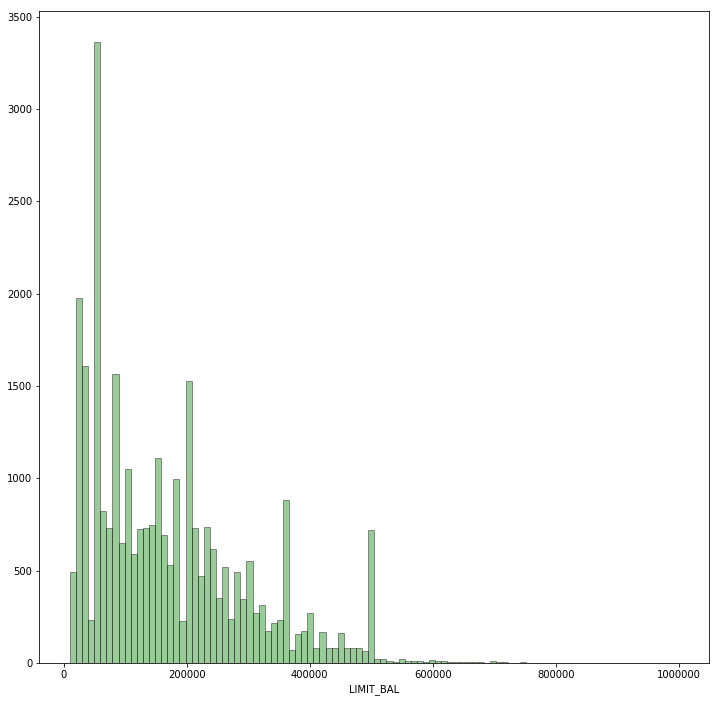

In [10]:
plt.figure(figsize=(12,12))
sns.distplot(bal_limit,hist=True,kde=False, color='Green',bins=100,hist_kws={'edgecolor':'black'})

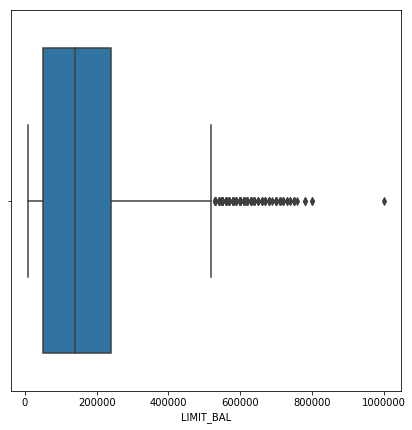

In [11]:
plt.figure(figsize=(7,7))
sns.boxplot(bal_limit)

2. How many instances have abnormal values? 

In [12]:
def IQR_func(column):
    Q1 = np.percentile(column.values, 25)
    Q3 = np.percentile(column.values, 75)
    IQR = Q3 - Q1 
    return IQR, Q1,Q3

In [13]:
IQR,Q1,Q3 = IQR_func(dt['LIMIT_BAL'])
low_quartile = Q1 - 1.5 * IQR
upp_quartile = Q3 + 1.5 * IQR

In [14]:
print('minimum range', low_quartile, '\nmaximum range', upp_quartile)

minimum range -235000.0 
maximum range 525000.0


In [15]:
(bal_limit > 525000).value_counts()/len(dt)*100

False    99.443333
True      0.556667
Name: LIMIT_BAL, dtype: float64

__Information__: The normal range of __balance limit__ is between __10,000__ to __0.2m__ while the __maximum value__ is __1m__. There are some outliers (about __0.55%__)in this feature given that the outliers are considered if balance limit is higher than __0.52m__(1.5 IQR).

3. Is there any **visual impact** on the distrubution of balance limit for **defaulter** and non **defaulters**?

i. De-faulters:

In [16]:
defaulters['LIMIT_BAL'].describe()

count      6636.000000
mean     130109.656420
std      115378.540571
min       10000.000000
25%       50000.000000
50%       90000.000000
75%      200000.000000
max      740000.000000
Name: LIMIT_BAL, dtype: float64

ii. Non-faulters:

In [17]:
non_defaulters['LIMIT_BAL'].describe()

count      23364.000000
mean      178099.726074
std       131628.359660
min        10000.000000
25%        70000.000000
50%       150000.000000
75%       250000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

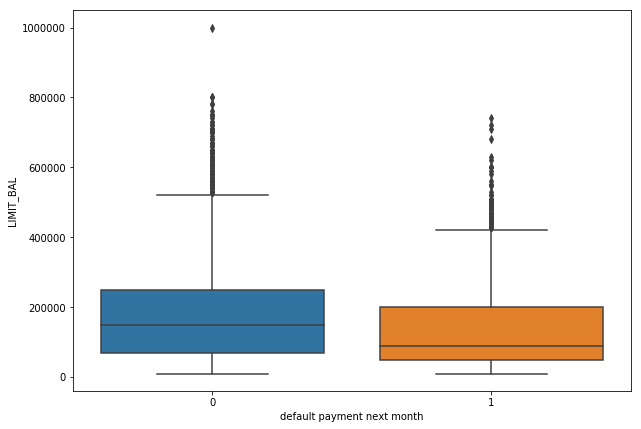

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=dt)

In [19]:
IQR,Q1,Q3 = IQR_func(defaulters['LIMIT_BAL'])
low_quartile = Q1 - 1.5 * IQR
upp_quartile = Q3 + 1.5 * IQR

In [20]:
print('minimum range', low_quartile, '\nmaximum range', upp_quartile)

minimum range -175000.0 
maximum range 425000.0


In [21]:
IQR,Q1,Q3 = IQR_func(non_defaulters['LIMIT_BAL'])
low_quartile = Q1 - 1.5 * IQR
upp_quartile = Q3 + 1.5 * IQR

In [22]:
print('minimum range', low_quartile, '\nmaximum range', upp_quartile)

minimum range -200000.0 
maximum range 520000.0


In [23]:
(defaulters['LIMIT_BAL'] >425000).value_counts()/len(defaulters)*100

False    97.182037
True      2.817963
Name: LIMIT_BAL, dtype: float64

In [24]:
(non_defaulters['LIMIT_BAL'] >520000).value_counts()/len(non_defaulters)*100

False    99.366547
True      0.633453
Name: LIMIT_BAL, dtype: float64

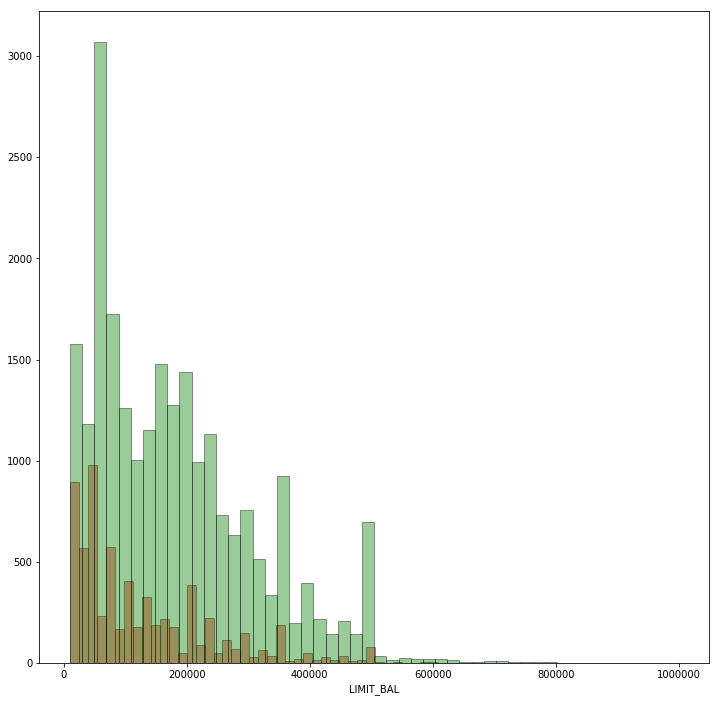

In [25]:
plt.figure(figsize=(12,12))
sns.distplot(defaulters['LIMIT_BAL'],hist=True,kde=False, color='red',bins=50,hist_kws={'edgecolor':'black'})
sns.distplot(non_defaulters['LIMIT_BAL'],hist=True,kde=False, color='green',bins=50,hist_kws={'edgecolor':'black'})

4. How many instances are below and above __0.2 million__ ?

In [26]:
dt['threshold'] = dt['LIMIT_BAL'].apply(lambda x: 'greater than 0.2m' if x > 200000 else 'less than 0.2m')
defaulters['threshold'] = defaulters['LIMIT_BAL'].apply(lambda x: 'greater than 0.2m' if x > 200000 else 'less than 0.2m')
non_defaulters['threshold'] = non_defaulters['LIMIT_BAL'].apply(lambda x: 'greater than 0.2m' if x > 200000 else 'less than 0.2m')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


i. Complete data:

In [27]:
crostbl = pd.crosstab(dt['threshold'], 'frequency').reset_index()
crostbl['share'] = crostbl['frequency'].apply(lambda x: (x/len(dt))*100)
crostbl

col_0,threshold,frequency,share
0,greater than 0.2m,9622,32.073333
1,less than 0.2m,20378,67.926667


ii. defaulters:

In [28]:
crostbl = pd.crosstab(defaulters['threshold'], 'frequency').reset_index()
crostbl['share'] = crostbl['frequency'].apply(lambda x: (x/len(defaulters))*100)
crostbl

col_0,threshold,frequency,share
0,greater than 0.2m,1417,21.353225
1,less than 0.2m,5219,78.646775


iii. Non-defaulters:

In [29]:
crostbl = pd.crosstab(non_defaulters['threshold'], 'frequency').reset_index()
crostbl['share'] = crostbl['frequency'].apply(lambda x: (x/len(non_defaulters))*100)
crostbl

col_0,threshold,frequency,share
0,greater than 0.2m,8205,35.11813
1,less than 0.2m,15159,64.88187


5. What is the correlation of __Limit of balance__ with __default__ ?<br>
First, __limit of balance__ which is __numerical and continuous__ in nature needs to be converted into __buckets (categorical)__ to run __chi-squared analysis__ for finding coorelation. 

In [30]:
dt['LIMIT_BAL_BUCKETS'] = np.where((dt['LIMIT_BAL'] >=10000) & (dt['LIMIT_BAL'] <200000), 'Low',
                          np.where((dt['LIMIT_BAL'] >=200000) & (dt['LIMIT_BAL'] <600000), 'medium','high'))

In [31]:
pd.crosstab(dt['default payment next month'],dt['LIMIT_BAL_BUCKETS'])

LIMIT_BAL_BUCKETS,Low,high,medium
default payment next month,,,
0,13901,86,9377
1,4949,9,1678


In [32]:
chi_value, p_value, dof, expected = chi2_contingency(pd.crosstab(dt['default payment next month'],dt['LIMIT_BAL_BUCKETS']))

In [33]:
print('chi statistic : ', chi_value)
print('p-value : ', p_value)
print('degree of freedom : ', dof)

chi statistic :  505.07436386048664
p-value :  2.1110348956156036e-110
degree of freedom :  2


__Conclusion__: The Variation of __limit of balance__ between __defaulters and non-defaulters__ and signficant value of __chi-statistics__ suggest that this feature is statistically significant and can be a good predictor. 

## <u> PAYMENT STATUS (HISTORY)<u>:

- **Payment status of Sept 2005** 

In [41]:
dt[dt['PAY_0']==0]['default payment next month'].value_counts()

0    12849
1     1888
Name: default payment next month, dtype: int64

1. What is the distribution?

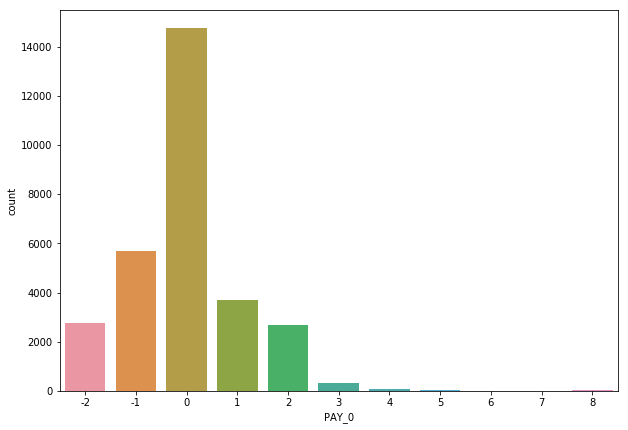

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x='PAY_0', data=dt)

2. What is the percentage of __0 and -2__ ? As it is not mentioned in the UCI repository guide and will be considered as irrelevant.

In [36]:
dt['PAY_0'].value_counts()/len(dt)*100

 0    49.123333
-1    18.953333
 1    12.293333
-2     9.196667
 2     8.890000
 3     1.073333
 4     0.253333
 5     0.086667
 8     0.063333
 6     0.036667
 7     0.030000
Name: PAY_0, dtype: float64

3. What is the distribution for __defaulters__ and __non-defaulters__?

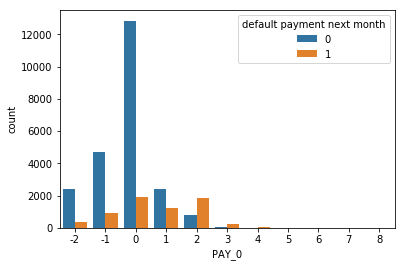

In [37]:
sns.countplot(x='PAY_0',hue='default payment next month', data=dt)

<u> __Defaulters__:

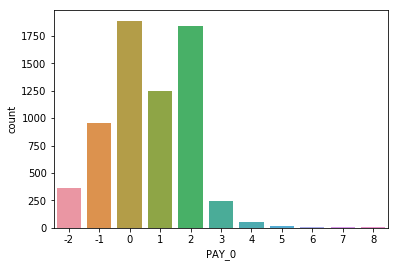

In [38]:
sns.countplot(x='PAY_0', data=defaulters)

In [39]:
defaulters['PAY_0'].value_counts()/len(defaulters)*100

 0    28.450874
 2    27.787824
 1    18.866787
-1    14.376130
-2     5.500301
 3     3.676914
 4     0.783605
 5     0.195901
 8     0.165763
 7     0.105485
 6     0.090416
Name: PAY_0, dtype: float64

<u> __Non-Defaulters__:

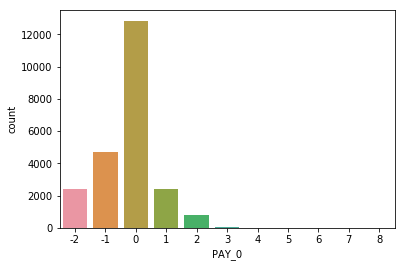

In [40]:
sns.countplot(x='PAY_0', data=non_defaulters)

In [41]:
non_defaulters['PAY_0'].value_counts()/len(non_defaulters)*100

 0    54.994864
-1    20.253381
 1    10.426297
-2    10.246533
 2     3.522513
 3     0.333847
 4     0.102722
 5     0.055641
 8     0.034241
 6     0.021400
 7     0.008560
Name: PAY_0, dtype: float64

- **Payment status of Aug 2005** 

1. What is the distribution?

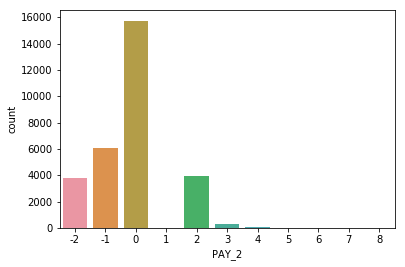

In [42]:
sns.countplot(x='PAY_2', data=dt)

2. What is the percentage of __0 and -2__ ? As it is not mentioned in the UCI repository guide and will be considered as irrelevant.

In [43]:
dt['PAY_2'].value_counts()/len(dt)*100

 0    52.433333
-1    20.166667
 2    13.090000
-2    12.606667
 3     1.086667
 4     0.330000
 1     0.093333
 5     0.083333
 7     0.066667
 6     0.040000
 8     0.003333
Name: PAY_2, dtype: float64

3. What is the distribution for __defaulters__ and __non-defaulters__?

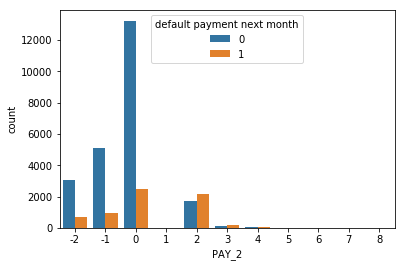

In [44]:
sns.countplot(x='PAY_2',hue='default payment next month', data=dt)

<u>__Defaulters__:

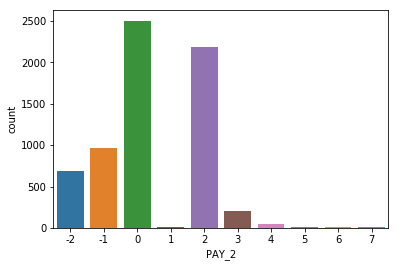

In [45]:
sns.countplot(x='PAY_2', data=defaulters)

In [46]:
defaulters['PAY_2'].value_counts()/len(defaulters)*100

 0    37.718505
 2    32.911392
-1    14.556962
-2    10.412899
 3     3.028933
 4     0.753466
 5     0.226040
 7     0.180832
 6     0.135624
 1     0.075347
Name: PAY_2, dtype: float64

<u> __Non-Defaulters__:

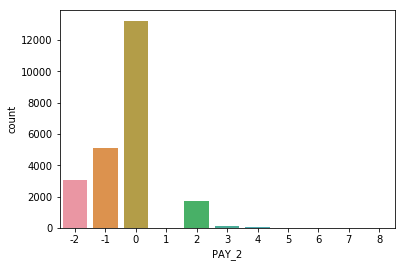

In [47]:
sns.countplot(x='PAY_2', data=non_defaulters)

In [48]:
non_defaulters['PAY_2'].value_counts()/len(non_defaulters)*100

 0    56.612738
-1    21.759973
-2    13.229755
 2     7.460195
 3     0.535011
 4     0.209724
 1     0.098442
 5     0.042801
 7     0.034241
 6     0.012840
 8     0.004280
Name: PAY_2, dtype: float64

- **Payment of July 2005** 

1. What is the distribution?

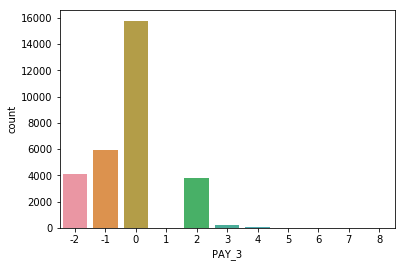

In [49]:
sns.countplot(x='PAY_3', data=dt)

2. What is the percentage of __0 and -2__ ? As it is not mentioned in the UCI repository guide and will be considered as irrelevant.

In [50]:
dt['PAY_3'].value_counts()/len(dt)*100

 0    52.546667
-1    19.793333
-2    13.616667
 2    12.730000
 3     0.800000
 4     0.253333
 7     0.090000
 6     0.076667
 5     0.070000
 1     0.013333
 8     0.010000
Name: PAY_3, dtype: float64

3. What is the distribution for __defaulters__ and __non-defaulters__?

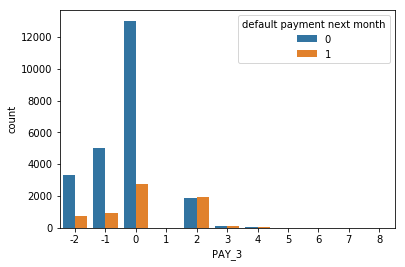

In [51]:
sns.countplot(x='PAY_3',hue='default payment next month', data=dt)

<u>__Defaulters__:

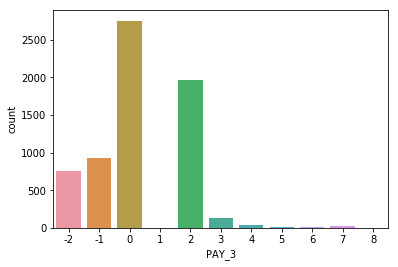

In [52]:
sns.countplot(x='PAY_3', data=defaulters)

In [53]:
defaulters['PAY_3'].value_counts()/len(defaulters)*100

 0    41.455696
 2    29.671489
-1    13.954189
-2    11.407474
 3     2.079566
 4     0.663050
 7     0.331525
 6     0.210970
 5     0.180832
 8     0.030139
 1     0.015069
Name: PAY_3, dtype: float64

<u> __Non-Defaulters__:

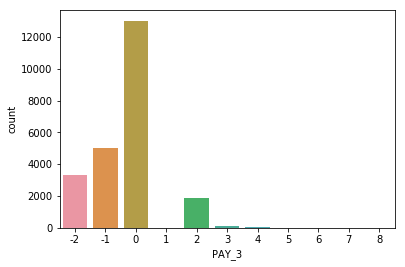

In [54]:
sns.countplot(x='PAY_3', data=non_defaulters)

In [55]:
non_defaulters['PAY_3'].value_counts()/len(non_defaulters)*100

 0    55.696798
-1    21.451806
-2    14.244136
 2     7.918165
 3     0.436569
 4     0.136963
 6     0.038521
 5     0.038521
 7     0.021400
 1     0.012840
 8     0.004280
Name: PAY_3, dtype: float64

- **Payment status of June 2005** 

1. What is the distribution?

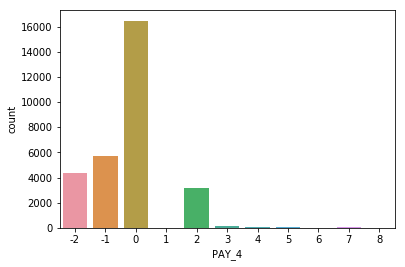

In [56]:
sns.countplot(x='PAY_4', data=dt)

2. What is the percentage of __0 and -2__ ? As it is not mentioned in the UCI repository guide and will be considered as irrelevant.

In [57]:
dt['PAY_4'].value_counts()/len(dt)*100

 0    54.850000
-1    18.956667
-2    14.493333
 2    10.530000
 3     0.600000
 4     0.230000
 7     0.193333
 5     0.116667
 6     0.016667
 8     0.006667
 1     0.006667
Name: PAY_4, dtype: float64

3. What is the distribution for __defaulters__ and __non-defaulters__?

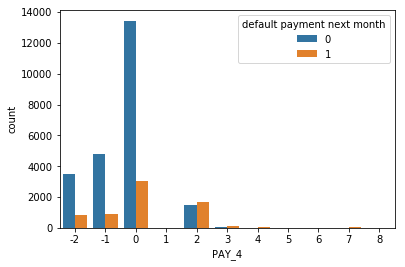

In [58]:
sns.countplot(x='PAY_4',hue='default payment next month', data=dt)

<u>__Defaulters__:

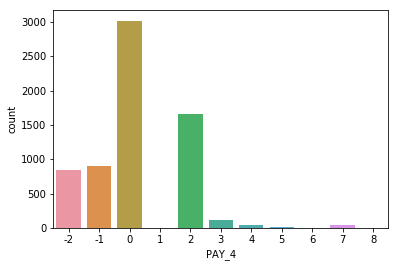

In [59]:
sns.countplot(x='PAY_4', data=defaulters)

In [60]:
defaulters['PAY_4'].value_counts()/len(defaulters)*100

 0    45.449066
 2    24.909584
-1    13.622664
-2    12.613020
 3     1.657625
 7     0.723327
 4     0.693189
 5     0.271248
 6     0.030139
 1     0.015069
 8     0.015069
Name: PAY_4, dtype: float64

<u> __Non-Defaulters__:

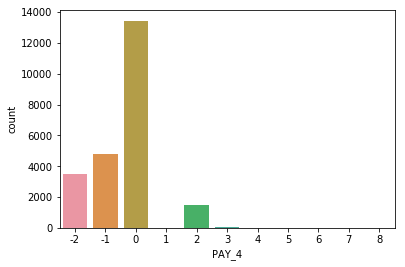

In [61]:
sns.countplot(x='PAY_4', data=non_defaulters)

In [62]:
non_defaulters['PAY_4'].value_counts()/len(non_defaulters)*100

 0    57.520116
-1    20.471666
-2    15.027393
 2     6.445814
 3     0.299606
 4     0.098442
 5     0.072762
 7     0.042801
 6     0.012840
 8     0.004280
 1     0.004280
Name: PAY_4, dtype: float64

- **Payment status of May 2005** 

1. What is the distribution?

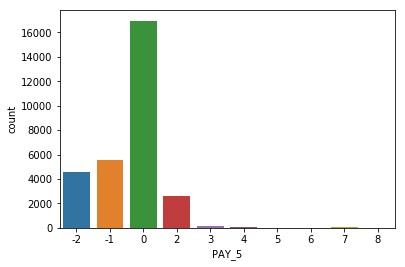

In [63]:
sns.countplot(x='PAY_5', data=dt)

2. What is the percentage of __0 and -2__ ? As it is not mentioned in the UCI repository guide and will be considered as irrelevant.

In [64]:
dt['PAY_5'].value_counts()/len(dt)*100

 0    56.490000
-1    18.463333
-2    15.153333
 2     8.753333
 3     0.593333
 4     0.280000
 7     0.193333
 5     0.056667
 6     0.013333
 8     0.003333
Name: PAY_5, dtype: float64

3. What is the distribution for __defaulters__ and __non-defaulters__?

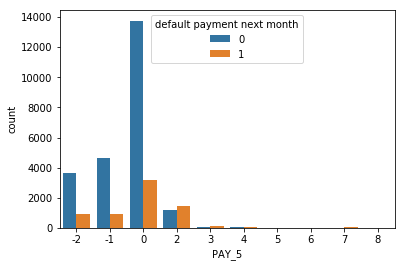

In [65]:
sns.countplot(x='PAY_5',hue='default payment next month', data=dt)

<u>__Defaulters__:

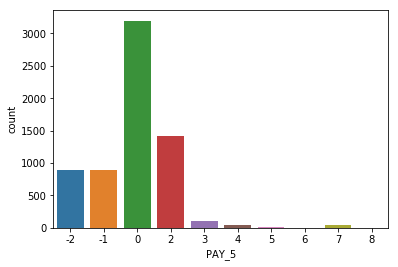

In [66]:
sns.countplot(x='PAY_5', data=defaulters)

In [67]:
defaulters['PAY_5'].value_counts()/len(defaulters)*100

 0    48.146474
 2    21.443641
-1    13.517179
-2    13.487040
 3     1.702833
 4     0.768535
 7     0.723327
 5     0.150693
 6     0.045208
 8     0.015069
Name: PAY_5, dtype: float64

<u> __Non-Defaulters__:

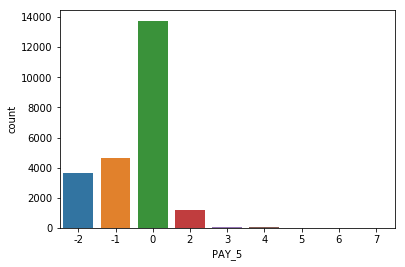

In [68]:
sns.countplot(x='PAY_5', data=non_defaulters)

In [69]:
non_defaulters['PAY_5'].value_counts()/len(non_defaulters)*100

 0    58.859784
-1    19.868173
-2    15.626605
 2     5.148947
 3     0.278206
 4     0.141243
 7     0.042801
 5     0.029961
 6     0.004280
Name: PAY_5, dtype: float64

- **Payment status of April 2005** 

1. What is the distribution?

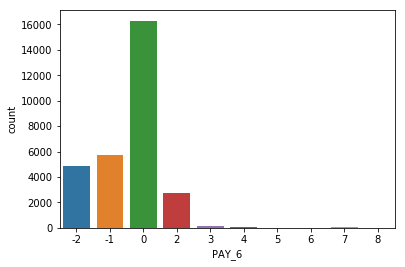

In [70]:
sns.countplot(x='PAY_6', data=dt)

2. What is the percentage of __0 and -2__ ? As it is not mentioned in the UCI repository guide and will be considered as irrelevant.

In [71]:
dt['PAY_6'].value_counts()/len(dt)*100

 0    54.286667
-1    19.133333
-2    16.316667
 2     9.220000
 3     0.613333
 4     0.163333
 7     0.153333
 6     0.063333
 5     0.043333
 8     0.006667
Name: PAY_6, dtype: float64

3. What is the distribution for __defaulters__ and __non-defaulters__?

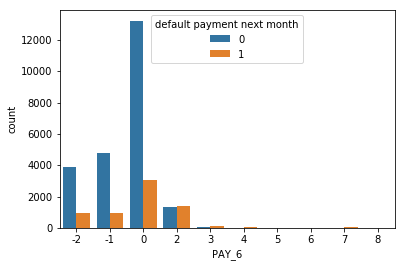

In [72]:
sns.countplot(x='PAY_6',hue='default payment next month', data=dt)

<u>__Defaulters__:

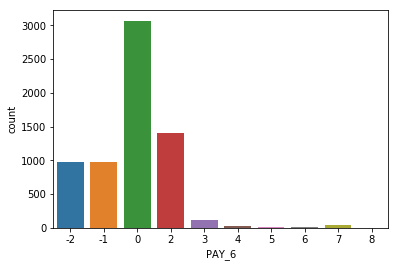

In [73]:
sns.countplot(x='PAY_6', data=defaulters)

In [74]:
defaulters['PAY_6'].value_counts()/len(defaulters)*100

 0    46.247740
 2    21.112116
-2    14.783002
-1    14.692586
 3     1.778180
 7     0.572634
 4     0.467149
 6     0.210970
 5     0.105485
 8     0.030139
Name: PAY_6, dtype: float64

<u> __Non-Defaulters__:

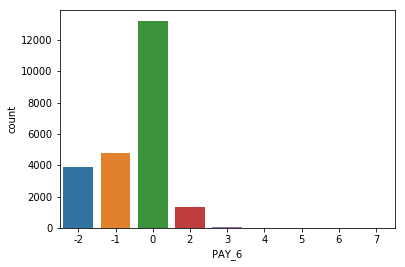

In [75]:
sns.countplot(x='PAY_6', data=non_defaulters)

In [76]:
non_defaulters['PAY_6'].value_counts()/len(non_defaulters)*100

 0    56.569937
-1    20.394624
-2    16.752268
 2     5.842322
 3     0.282486
 4     0.077042
 7     0.034241
 5     0.025681
 6     0.021400
Name: PAY_6, dtype: float64

__Information__: It can be seen that payment of last six months (from April 2005 till sept 2005) has a consistent pattern, in general __status 0__ (which is not defined by UCI repository) has the highest occurences (share in that data) whereas, in __default cases__ the __two months late payment__ is a common and consistent trends that can be seen in all the payment status of last six months last but not least in __non-default cases__ the __Pay duly__ is a common and consistent trend for the last last six months. Since __0 and -2__ aren't valid statuses they can be replace with most occuring status in __defaulters and non-defaulters__.

## <u> Bill Amount (History)<u>:

- **Bill Amount for Sept 2005** 

1. What is the distribution?

In [77]:
dt['BILL_AMT1'].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

<u>Histogram:

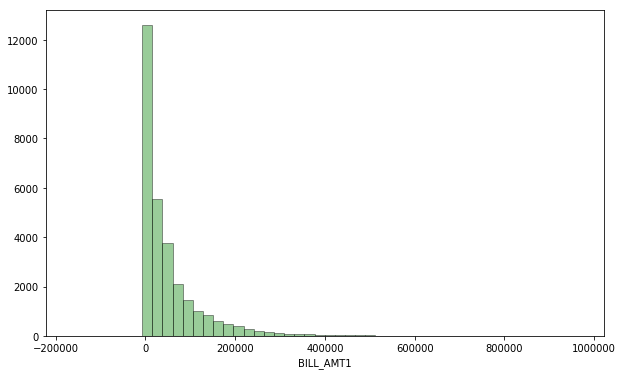

In [78]:
plt.figure(figsize=(10,6))
sns.distplot(dt['BILL_AMT1'], kde=False, hist=True,bins=50,color='Green',hist_kws={'edgecolor':'black'})

2. What is the distribution of __defaulters__ and __non-defaulters__?

<u>__Defaulters__:

In [79]:
defaulters['BILL_AMT1'].describe()

count      6636.000000
mean      48509.162297
std       73782.067220
min       -6676.000000
25%        2987.750000
50%       20185.000000
75%       59626.500000
max      613860.000000
Name: BILL_AMT1, dtype: float64

<u>__Non-Defaulters__:

In [80]:
non_defaulters['BILL_AMT1'].describe()

count     23364.000000
mean      51994.227273
std       73577.606694
min     -165580.000000
25%        3677.250000
50%       23119.500000
75%       69027.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

<u> Boxplot:

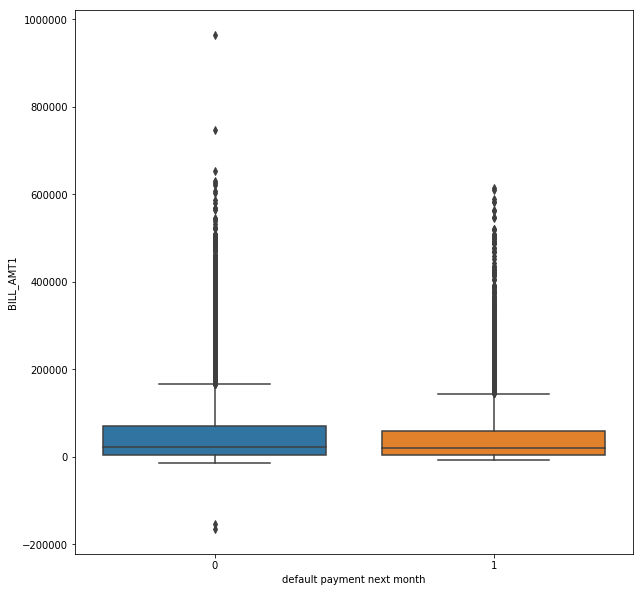

In [81]:
plt.figure(figsize=(10,10))
sns.boxplot(x='default payment next month', y='BILL_AMT1', data=dt)

<u> Histogram:

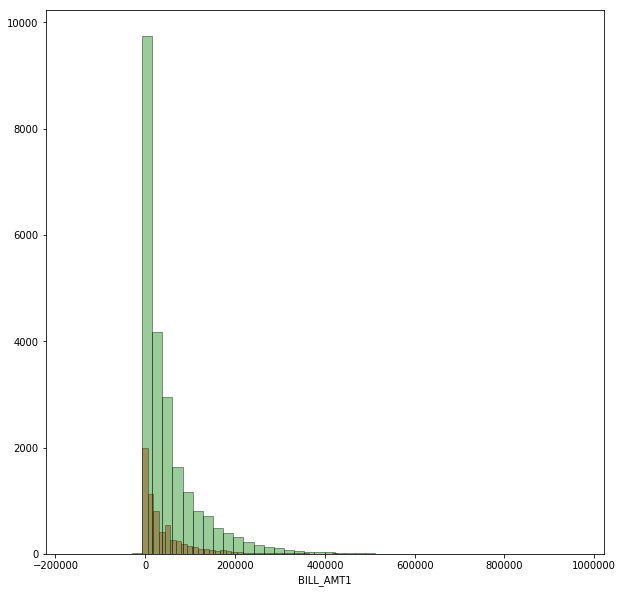

In [82]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT1'], kde=False, hist=True,bins=50,color='red',hist_kws={'edgecolor':'black'})
sns.distplot(non_defaulters['BILL_AMT1'], kde=False, hist=True,bins=50,color='green',hist_kws={'edgecolor':'black'})

<u> Kernal Density:

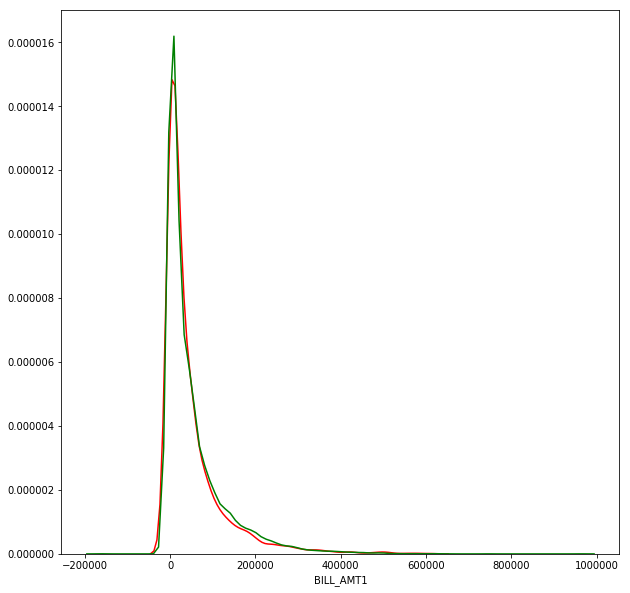

In [83]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT1'], kde=True, hist=False,bins=50,color='red')
sns.distplot(non_defaulters['BILL_AMT1'], kde=True, hist=False,bins=50,color='green')

- **Bill Amount for Aug 2005** 

1. What is the distribution?

In [84]:
dt['BILL_AMT2'].describe()

count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64

<u>Histogram:

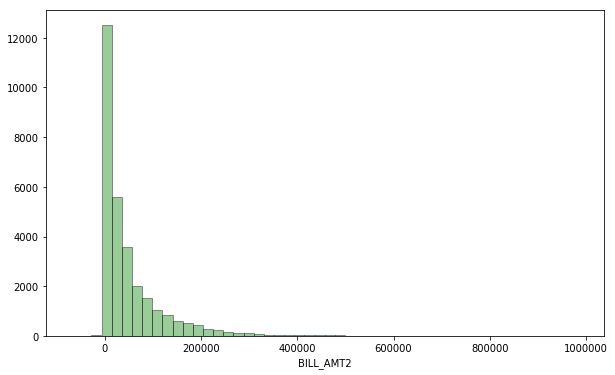

In [85]:
plt.figure(figsize=(10,6))
sns.distplot(dt['BILL_AMT2'], kde=False, hist=True,bins=50,color='Green',hist_kws={'edgecolor':'black'})

2. What is the distribution of __defaulters__ and __non-defaulters__?

<u>__Defaulters__:

In [86]:
defaulters['BILL_AMT2'].describe()

count      6636.000000
mean      47283.617842
std       71651.030364
min      -17710.000000
25%        2694.000000
50%       20300.500000
75%       57919.750000
max      581775.000000
Name: BILL_AMT2, dtype: float64

<u>__Non-Defaulters__:

In [87]:
non_defaulters['BILL_AMT2'].describe()

count     23364.000000
mean      49717.435670
std       71029.946709
min      -69777.000000
25%        3055.000000
50%       21660.500000
75%       65686.000000
max      983931.000000
Name: BILL_AMT2, dtype: float64

<u> Boxplot:

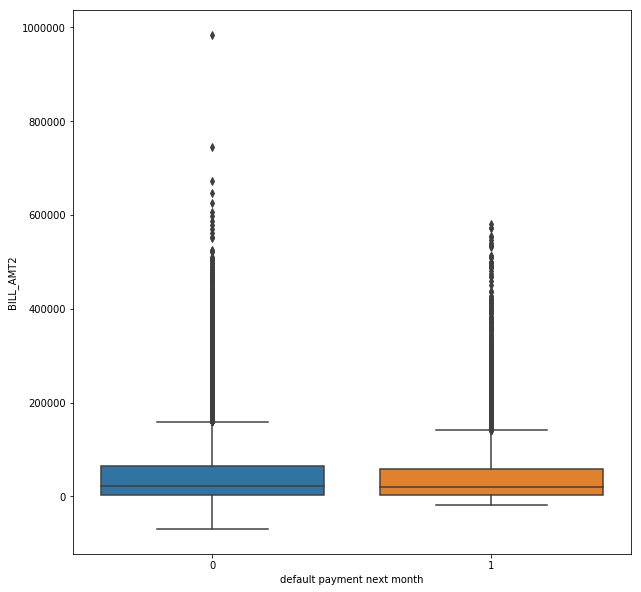

In [88]:
plt.figure(figsize=(10,10))
sns.boxplot(x='default payment next month', y='BILL_AMT2', data=dt)

<u> Histogram:

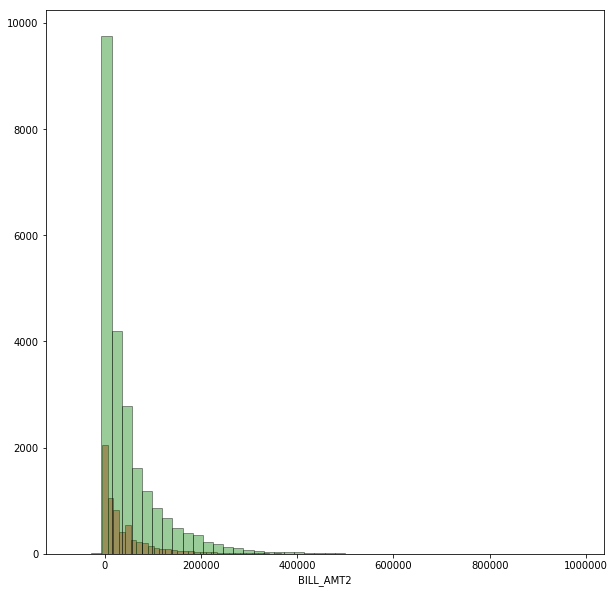

In [89]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT2'], kde=False, hist=True,bins=50,color='red',hist_kws={'edgecolor':'black'})
sns.distplot(non_defaulters['BILL_AMT2'], kde=False, hist=True,bins=50,color='green',hist_kws={'edgecolor':'black'})

<u> Kernal Density:

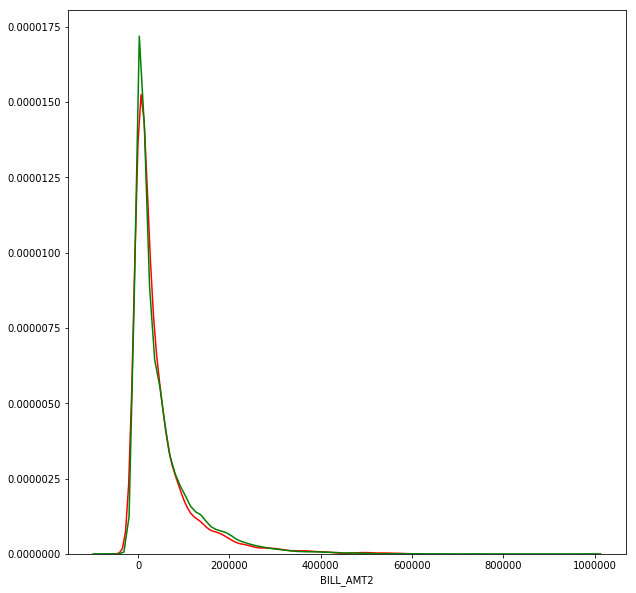

In [90]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT2'], kde=True, hist=False,bins=50,color='red')
sns.distplot(non_defaulters['BILL_AMT2'], kde=True, hist=False,bins=50,color='green')

- **Bill Amount for July 2005** 

1. What is the distribution?

In [91]:
dt['BILL_AMT3'].describe()

count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64

<u>Histogram:

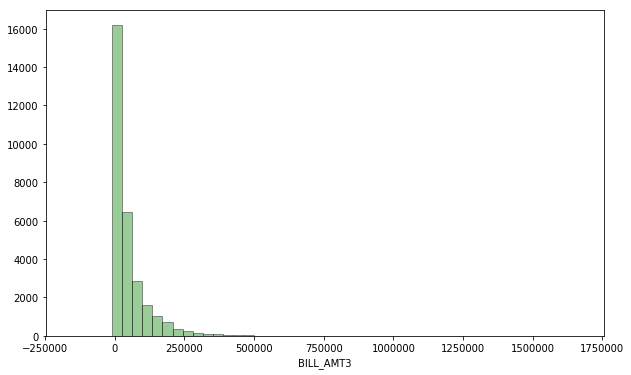

In [92]:
plt.figure(figsize=(10,6))
sns.distplot(dt['BILL_AMT3'], kde=False, hist=True,bins=50,color='Green',hist_kws={'edgecolor':'black'})

2. What is the distribution of __defaulters__ and __non-defaulters__?

<u>__Defaulters__:

In [93]:
defaulters['BILL_AMT3'].describe()

count      6636.000000
mean      45181.598855
std       68516.975738
min      -61506.000000
25%        2500.000000
50%       19834.500000
75%       54733.750000
max      578971.000000
Name: BILL_AMT3, dtype: float64

<u>__Non-Defaulters__:

In [94]:
non_defaulters['BILL_AMT3'].describe()

count    2.336400e+04
mean     4.753337e+04
std      6.957666e+04
min     -1.572640e+05
25%      2.769750e+03
50%      2.020250e+04
75%      6.189400e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64

<u> Boxplot:

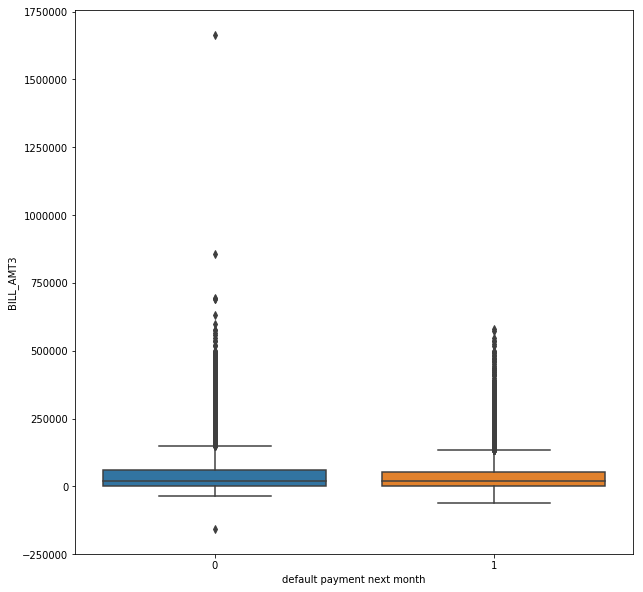

In [95]:
plt.figure(figsize=(10,10))
sns.boxplot(x='default payment next month', y='BILL_AMT3', data=dt)

<u> Histogram:

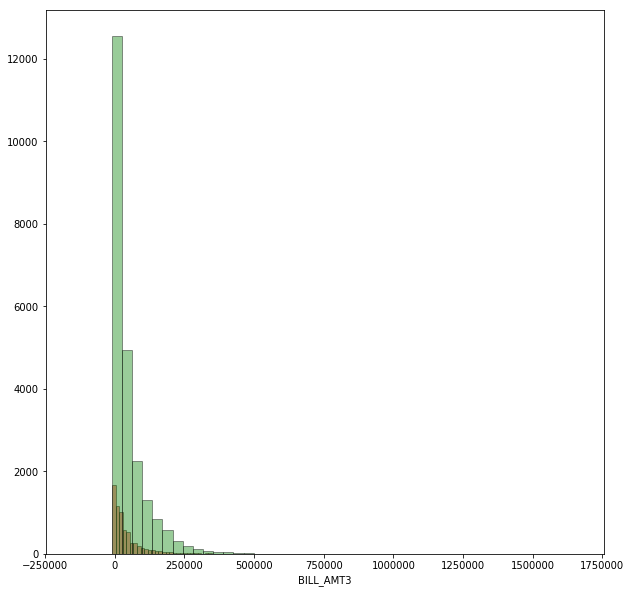

In [96]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT3'], kde=False, hist=True,bins=50,color='red',hist_kws={'edgecolor':'black'})
sns.distplot(non_defaulters['BILL_AMT3'], kde=False, hist=True,bins=50,color='green',hist_kws={'edgecolor':'black'})

<u> Kernal Density:

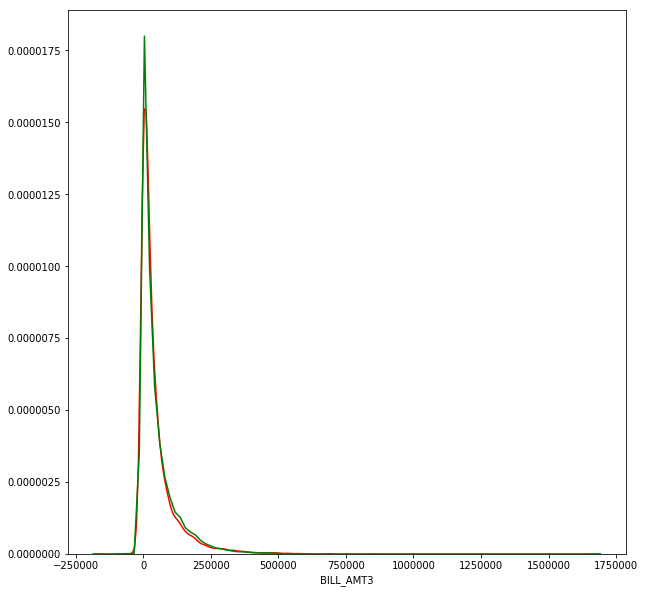

In [97]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT3'], kde=True, hist=False,bins=50,color='red')
sns.distplot(non_defaulters['BILL_AMT3'], kde=True, hist=False,bins=50,color='green')

- **Bill Amount for June 2005** 

1. What is the distribution?

In [98]:
dt['BILL_AMT4'].describe()

count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64

<u>Histogram:

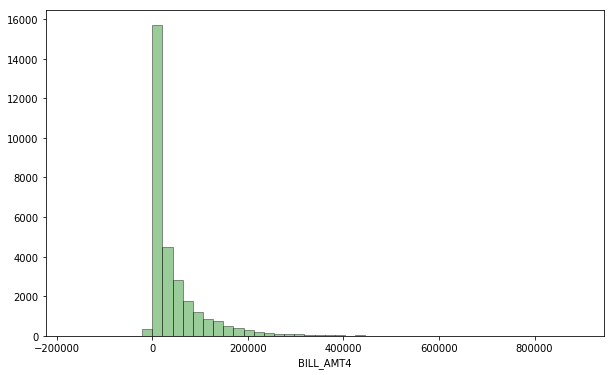

In [99]:
plt.figure(figsize=(10,6))
sns.distplot(dt['BILL_AMT4'], kde=False, hist=True,bins=50,color='Green',hist_kws={'edgecolor':'black'})

2. What is the distribution of __defaulters__ and __non-defaulters__?

<u>__Defaulters__:

In [100]:
defaulters['BILL_AMT4'].describe()

count      6636.000000
mean      42036.950573
std       64351.076092
min      -65167.000000
25%        2141.500000
50%       19119.500000
75%       50175.750000
max      548020.000000
Name: BILL_AMT4, dtype: float64

<u>__Non-Defaulters__:

In [101]:
non_defaulters['BILL_AMT4'].describe()

count     23364.000000
mean      43611.165254
std       64324.796730
min     -170000.000000
25%        2360.000000
50%       19000.000000
75%       55988.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64

<u> Boxplot:

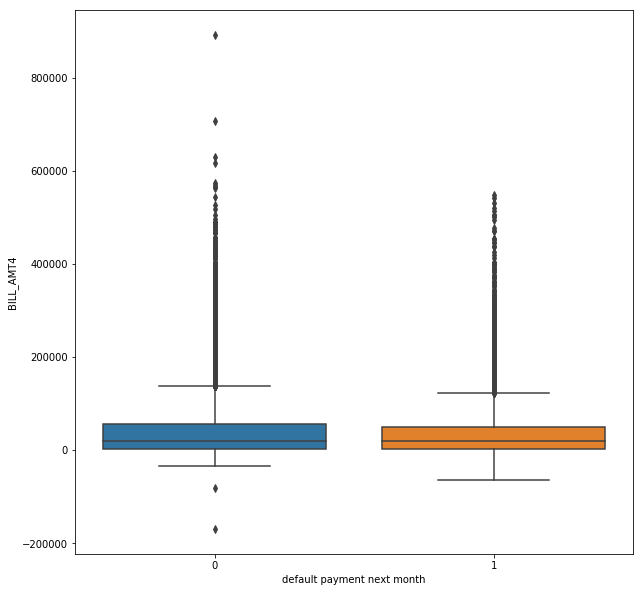

In [102]:
plt.figure(figsize=(10,10))
sns.boxplot(x='default payment next month', y='BILL_AMT4', data=dt)

<u> Histogram:

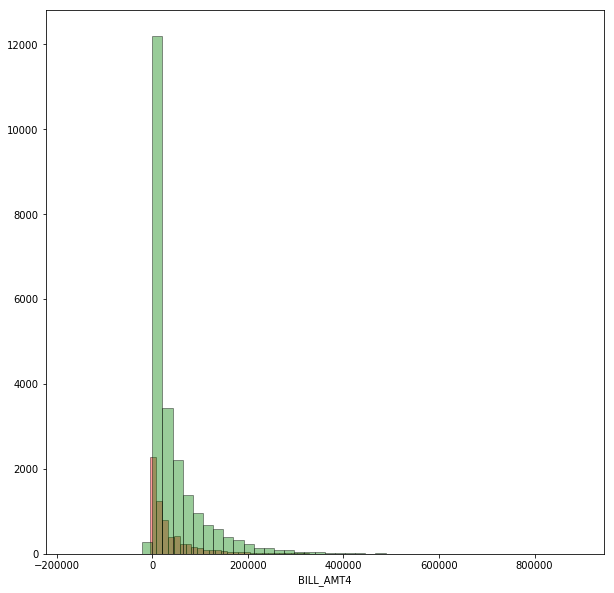

In [103]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT4'], kde=False, hist=True,bins=50,color='red',hist_kws={'edgecolor':'black'})
sns.distplot(non_defaulters['BILL_AMT4'], kde=False, hist=True,bins=50,color='green',hist_kws={'edgecolor':'black'})

<u> Kernal Density:

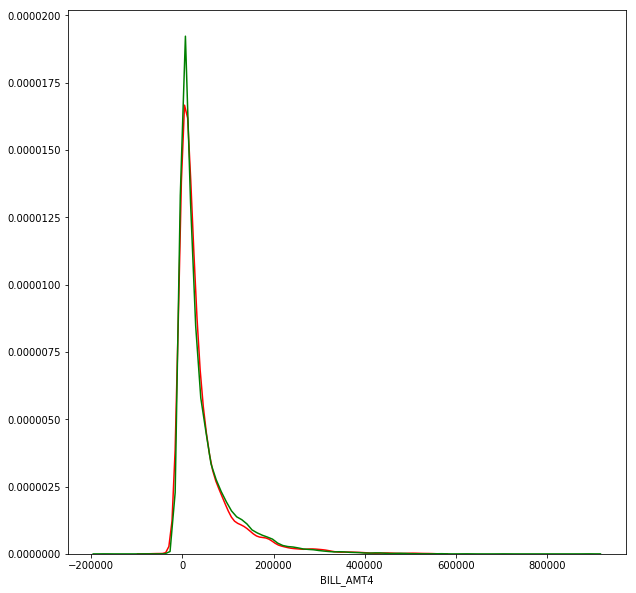

In [104]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT4'], kde=True, hist=False,bins=50,color='red')
sns.distplot(non_defaulters['BILL_AMT4'], kde=True, hist=False,bins=50,color='green')

- **Bill Amount for May 2005** 

1. What is the distribution?

In [105]:
dt['BILL_AMT5'].describe()

count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500000
75%       50190.500000
max      927171.000000
Name: BILL_AMT5, dtype: float64

<u>Histogram:

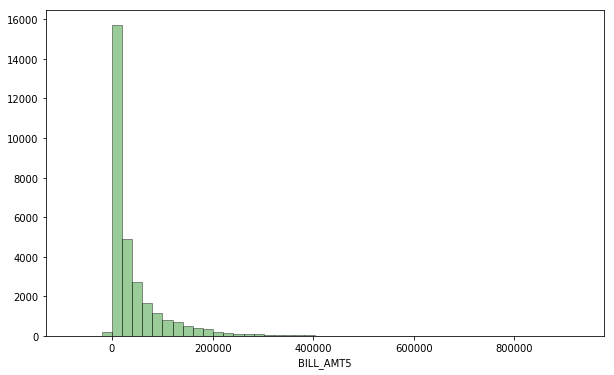

In [106]:
plt.figure(figsize=(10,6))
sns.distplot(dt['BILL_AMT5'], kde=False, hist=True,bins=50,color='Green',hist_kws={'edgecolor':'black'})

2. What is the distribution of __defaulters__ and __non-defaulters__?

<u>__Defaulters__:

In [107]:
defaulters['BILL_AMT5'].describe()

count      6636.000000
mean      39540.190476
std       61424.695949
min      -53007.000000
25%        1502.750000
50%       18478.500000
75%       47853.000000
max      547880.000000
Name: BILL_AMT5, dtype: float64

<u>__Non-Defaulters__:

In [108]:
non_defaulters['BILL_AMT5'].describe()

count     23364.000000
mean      40530.445343
std       60617.268112
min      -81334.000000
25%        1823.000000
50%       17998.000000
75%       51135.250000
max      927171.000000
Name: BILL_AMT5, dtype: float64

<u> Boxplot:

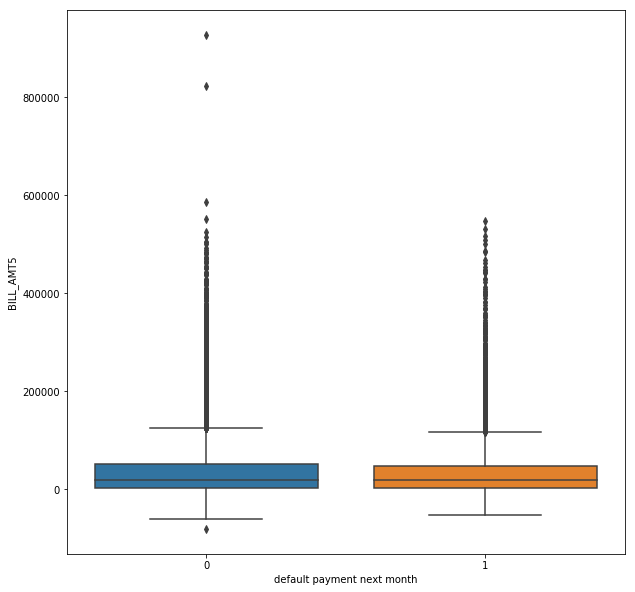

In [109]:
plt.figure(figsize=(10,10))
sns.boxplot(x='default payment next month', y='BILL_AMT5', data=dt)

<u> Histogram:

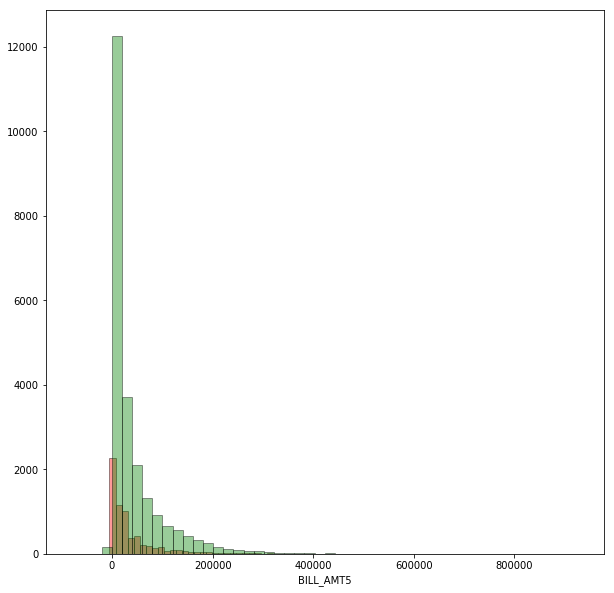

In [110]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT5'], kde=False, hist=True,bins=50,color='red',hist_kws={'edgecolor':'black'})
sns.distplot(non_defaulters['BILL_AMT5'], kde=False, hist=True,bins=50,color='green',hist_kws={'edgecolor':'black'})

<u> Kernal Density:

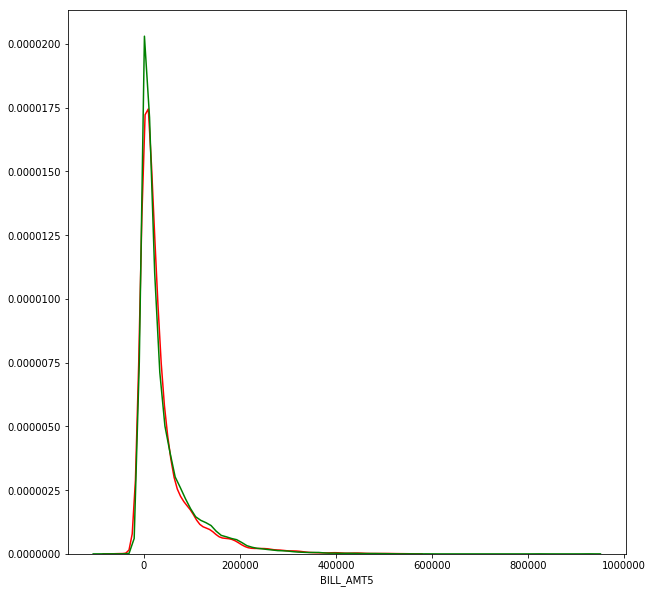

In [111]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT5'], kde=True, hist=False,bins=50,color='red')
sns.distplot(non_defaulters['BILL_AMT5'], kde=True, hist=False,bins=50,color='green')

- **Bill Amount for April 2005** 

1. What is the distribution?

In [112]:
dt['BILL_AMT6'].describe()

count     30000.000000
mean      38871.760400
std       59554.107537
min     -339603.000000
25%        1256.000000
50%       17071.000000
75%       49198.250000
max      961664.000000
Name: BILL_AMT6, dtype: float64

<u>Histogram:

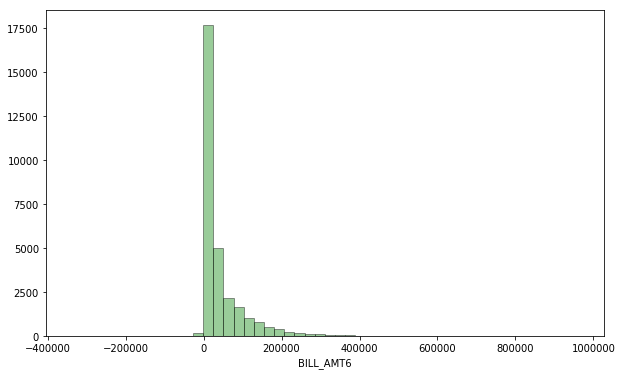

In [113]:
plt.figure(figsize=(10,6))
sns.distplot(dt['BILL_AMT6'], kde=False, hist=True,bins=50,color='Green',hist_kws={'edgecolor':'black'})

2. What is the distribution of __defaulters__ and __non-defaulters__?

<u>__Defaulters__:

In [114]:
defaulters['BILL_AMT6'].describe()

count      6636.000000
mean      38271.435503
std       59579.674268
min     -339603.000000
25%        1150.000000
50%       18028.500000
75%       47424.000000
max      514975.000000
Name: BILL_AMT6, dtype: float64

<u>__Non-Defaulters__:

In [115]:
non_defaulters['BILL_AMT6'].describe()

count     23364.000000
mean      39042.268704
std       59547.015717
min     -209051.000000
25%        1265.500000
50%       16679.000000
75%       49842.500000
max      961664.000000
Name: BILL_AMT6, dtype: float64

<u> Boxplot:

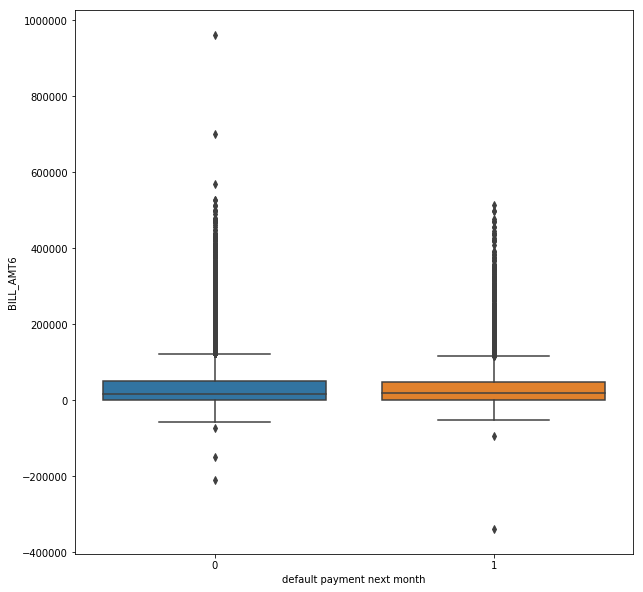

In [116]:
plt.figure(figsize=(10,10))
sns.boxplot(x='default payment next month', y='BILL_AMT6', data=dt)

<u> Histogram:

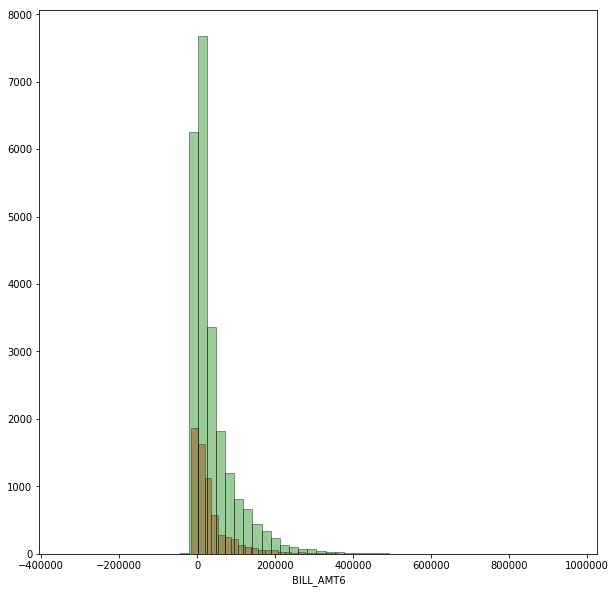

In [117]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT6'], kde=False, hist=True,bins=50,color='red',hist_kws={'edgecolor':'black'})
sns.distplot(non_defaulters['BILL_AMT6'], kde=False, hist=True,bins=50,color='green',hist_kws={'edgecolor':'black'})

<u> Kernal Density:

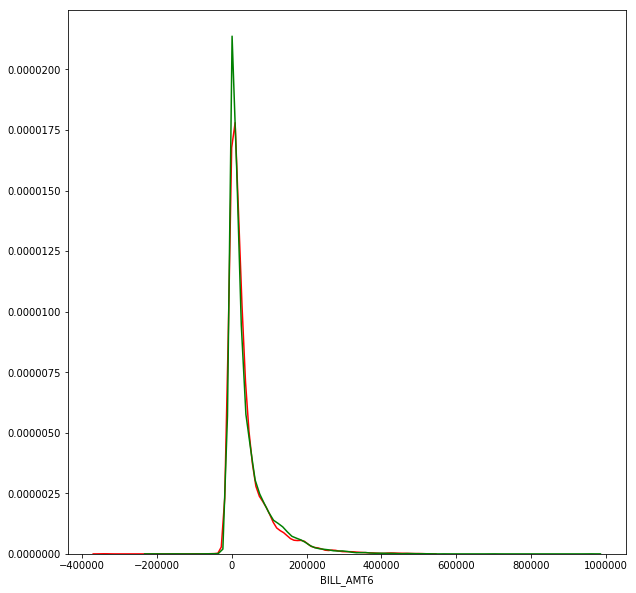

In [118]:
plt.figure(figsize=(10,10))
sns.distplot(defaulters['BILL_AMT6'], kde=True, hist=False,bins=50,color='red')
sns.distplot(non_defaulters['BILL_AMT6'], kde=True, hist=False,bins=50,color='green')

__Information__: There is not significant distinction observed between the __defaulters and non-defaulters__ with respect to the __Bill Amount__. 

## <u> PAYMENT (HISTORY)<u>:

- **Payment for Sept 2005** 

1. What is the distribution?

In [119]:
dt['PAY_AMT1'].describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

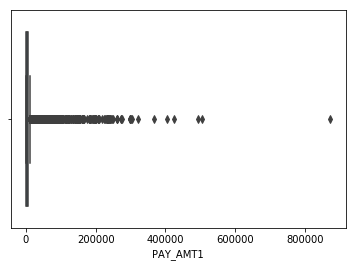

In [120]:
sns.boxplot(x='PAY_AMT1',data=dt)

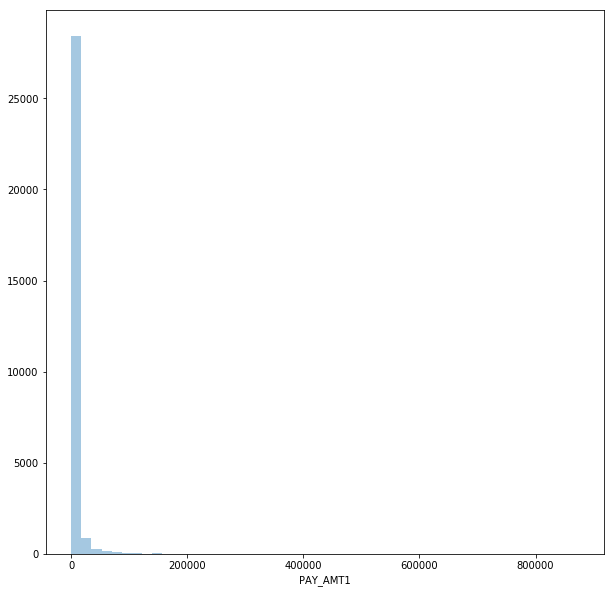

In [121]:
plt.figure(figsize=(10,10))
sns.distplot(dt['PAY_AMT1'], bins=50, kde=False)

2.What is the distribution in case of __defaulters__ and __non-defaulters__? 

<u>__De-faulters__:

In [122]:
defaulters['PAY_AMT1'].describe()

count      6636.000000
mean       3397.044153
std        9544.252427
min           0.000000
25%           0.000000
50%        1636.000000
75%        3478.250000
max      300000.000000
Name: PAY_AMT1, dtype: float64

<u>__Non-faulters__:

In [123]:
non_defaulters['PAY_AMT1'].describe()

count     23364.000000
mean       6307.337357
std       18014.508990
min           0.000000
25%        1163.750000
50%        2459.500000
75%        5606.250000
max      873552.000000
Name: PAY_AMT1, dtype: float64

<u> Boxplots:

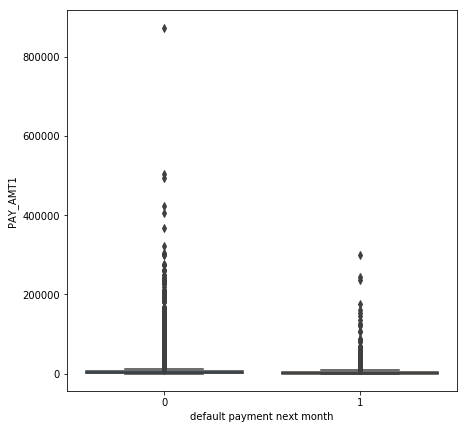

In [124]:
plt.figure(figsize=(7,7))
sns.boxplot(x='default payment next month', y='PAY_AMT1', data=dt)

<u> Histogram:

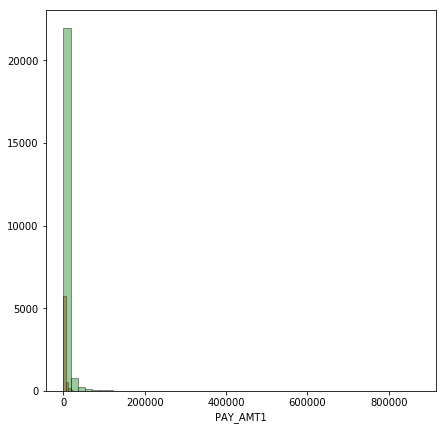

In [125]:
plt.figure(figsize=(7,7))
sns.distplot(defaulters['PAY_AMT1'],bins=50, kde=False,color='red', hist_kws={'edgecolor':'black'})
sns.distplot(non_defaulters['PAY_AMT1'],bins=50, kde=False,color='green', hist_kws={'edgecolor':'black'})

<u> Kernal Density:

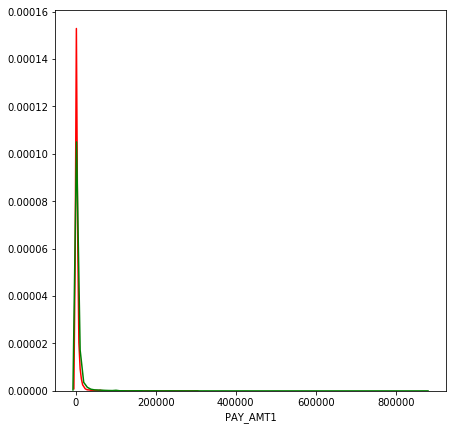

In [126]:
plt.figure(figsize=(7,7))
sns.distplot(defaulters['PAY_AMT1'],bins=50, kde=True,hist=False,color='red')
sns.distplot(non_defaulters['PAY_AMT1'],bins=50, kde=True,hist=False,color='green')

<u> Bucket analysis:

In [127]:
dt['PAY_AMT1_BUCKET']= np.where((dt['PAY_AMT1'] >-1) & (dt['PAY_AMT1'] <10000),'Normal',
                       np.where((dt['PAY_AMT1'] > 10000) & (dt['PAY_AMT1'] <20000),'High','Abormal'))         
defaulters['PAY_AMT1_BUCKET']= np.where((defaulters['PAY_AMT1'] >-1) & (defaulters['PAY_AMT1'] <10000),'Normal',
                       np.where((defaulters['PAY_AMT1'] > 10000) & (defaulters['PAY_AMT1'] <20000),'High','Abormal'))         
non_defaulters['PAY_AMT1_BUCKET']= np.where((non_defaulters['PAY_AMT1'] >-1) & (non_defaulters['PAY_AMT1'] <10000),'Normal',
                       np.where((non_defaulters['PAY_AMT1'] > 10000) & (non_defaulters['PAY_AMT1'] <20000),'High','Abormal'))         

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [128]:
(dt['PAY_AMT1_BUCKET']).value_counts()/len(dt)*100

Normal     87.88
High        6.12
Abormal     6.00
Name: PAY_AMT1_BUCKET, dtype: float64

<u> __Complete data:__

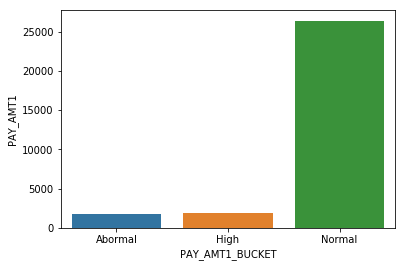

In [131]:
agg_dt = dt.groupby(by=['PAY_AMT1_BUCKET'])['PAY_AMT1'].count().reset_index()
sns.barplot(x='PAY_AMT1_BUCKET',y='PAY_AMT1', data=agg_dt )

<u> __Defaulters:__

In [133]:
(defaulters['PAY_AMT1_BUCKET']).value_counts()/len(defaulters)*100

Normal     93.384569
High        4.068716
Abormal     2.546715
Name: PAY_AMT1_BUCKET, dtype: float64

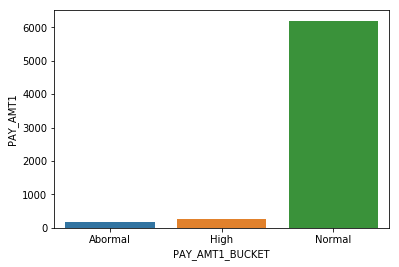

In [134]:
agg_dt = defaulters.groupby(by=['PAY_AMT1_BUCKET'])['PAY_AMT1'].count().reset_index()
sns.barplot(x='PAY_AMT1_BUCKET',y='PAY_AMT1', data=agg_dt )

<u> __Non-Defaulters:__

In [135]:
(non_defaulters['PAY_AMT1_BUCKET']).value_counts()/len(non_defaulters)*100

Normal     86.316555
Abormal     6.980825
High        6.702619
Name: PAY_AMT1_BUCKET, dtype: float64

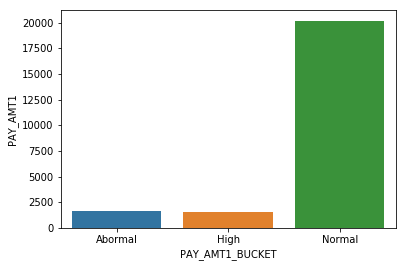

In [136]:
agg_dt = non_defaulters.groupby(by=['PAY_AMT1_BUCKET'])['PAY_AMT1'].count().reset_index()
sns.barplot(x='PAY_AMT1_BUCKET',y='PAY_AMT1', data=agg_dt )

Text(0.5, 0, 'Non-faulters')

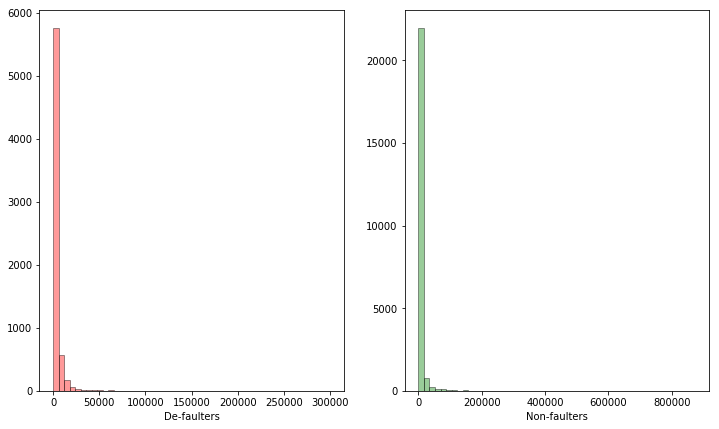

In [137]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,7))
sns.distplot(defaulters['PAY_AMT1'],bins=50, kde=False,color='red', hist_kws={'edgecolor':'black'},ax=ax[0])
ax[0].set_xlabel('De-faulters')
sns.distplot(non_defaulters['PAY_AMT1'],bins=50, kde=False,color='green', hist_kws={'edgecolor':'black'},ax=ax[1])
ax[1].set_xlabel('Non-faulters')

Text(0.5, 0, 'Non-faulters')

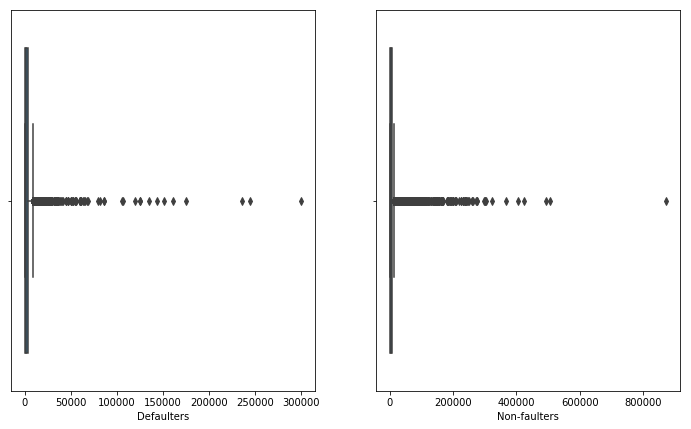

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,7))
sns.boxplot(x='PAY_AMT1',data=defaulters,ax=ax[0])
ax[0].set_xlabel('Defaulters')
sns.boxplot(x='PAY_AMT1',data=non_defaulters,ax=ax[1])
ax[1].set_xlabel('Non-faulters')

- **Payment for Aug 2005** 

1. What is the distribution?

In [139]:
dt['PAY_AMT2'].describe()

count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: PAY_AMT2, dtype: float64

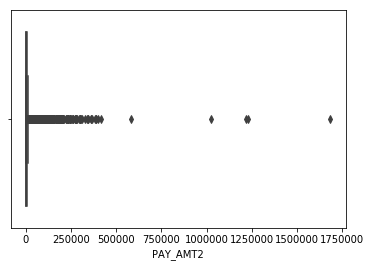

In [140]:
sns.boxplot(x='PAY_AMT2',data=dt)

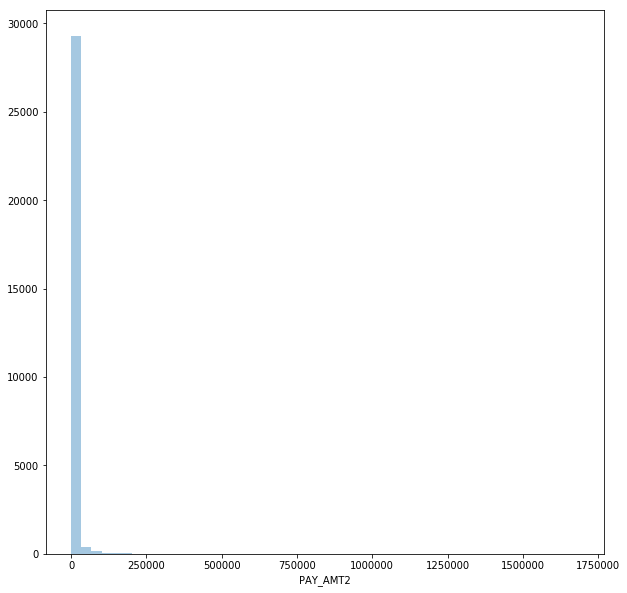

In [141]:
plt.figure(figsize=(10,10))
sns.distplot(dt['PAY_AMT2'], bins=50, kde=False)

2.What is the distribution in case of __defaulters__ and __non-defaulters__? 

<u>__De-faulters__:

In [142]:
defaulters['PAY_AMT2'].describe()

count      6636.000000
mean       3388.649638
std       11737.986064
min           0.000000
25%           0.000000
50%        1533.500000
75%        3309.750000
max      358689.000000
Name: PAY_AMT2, dtype: float64

<u>__Non-defaulters__:

In [143]:
pd.options.display.float_format = '{:.2f}'.format

In [144]:
non_defaulters['PAY_AMT2'].describe()

count     23364.00
mean       6640.47
std       25302.26
min           0.00
25%        1005.00
50%        2247.50
75%        5311.25
max     1684259.00
Name: PAY_AMT2, dtype: float64

<u> Boxplots:

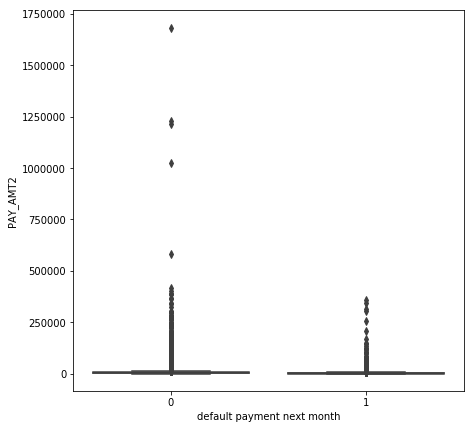

In [145]:
plt.figure(figsize=(7,7))
sns.boxplot(x='default payment next month', y='PAY_AMT2', data=dt)

<u> Histogram:

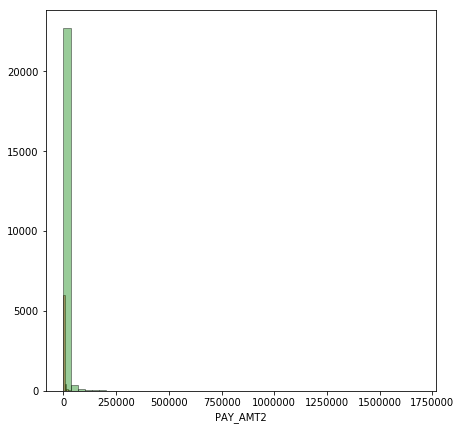

In [146]:
plt.figure(figsize=(7,7))
sns.distplot(defaulters['PAY_AMT2'],bins=50, kde=False,color='red', hist_kws={'edgecolor':'black'})
sns.distplot(non_defaulters['PAY_AMT2'],bins=50, kde=False,color='green', hist_kws={'edgecolor':'black'})

<u> Kernal Density:

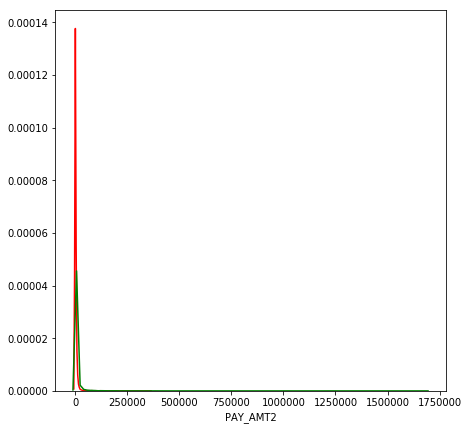

In [147]:
plt.figure(figsize=(7,7))
sns.distplot(defaulters['PAY_AMT2'],bins=50, kde=True,hist=False,color='red')
sns.distplot(non_defaulters['PAY_AMT2'],bins=50, kde=True,hist=False,color='green')

<u> Bucket analysis:

In [148]:
dt['PAY_AMT2_BUCKET']= np.where((dt['PAY_AMT2'] >-1) & (dt['PAY_AMT2'] <10000),'Normal',
                       np.where((dt['PAY_AMT2'] > 10000) & (dt['PAY_AMT2'] <20000),'High','Abormal'))         
defaulters['PAY_AMT2_BUCKET']= np.where((defaulters['PAY_AMT2'] >-1) & (defaulters['PAY_AMT2'] <10000),'Normal',
                       np.where((defaulters['PAY_AMT2'] > 10000) & (defaulters['PAY_AMT2'] <20000),'High','Abormal'))         
non_defaulters['PAY_AMT2_BUCKET']= np.where((non_defaulters['PAY_AMT2'] >-1) & (non_defaulters['PAY_AMT2'] <10000),'Normal',
                       np.where((non_defaulters['PAY_AMT2'] > 10000) & (non_defaulters['PAY_AMT2'] <20000),'High','Abormal'))         

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [149]:
(dt['PAY_AMT2_BUCKET']).value_counts()/len(dt)*100

Normal    88.10
High       6.08
Abormal    5.83
Name: PAY_AMT2_BUCKET, dtype: float64

<u> __Complete data:__

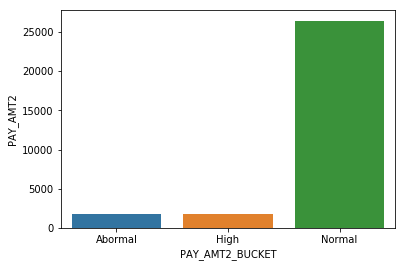

In [150]:
agg_dt = dt.groupby(by=['PAY_AMT2_BUCKET'])['PAY_AMT2'].count().reset_index()
sns.barplot(x='PAY_AMT2_BUCKET',y='PAY_AMT2', data=agg_dt )

<u> __Defaulters:__

In [151]:
(defaulters['PAY_AMT2_BUCKET']).value_counts()/len(defaulters)*100

Normal    94.02
High       3.86
Abormal    2.12
Name: PAY_AMT2_BUCKET, dtype: float64

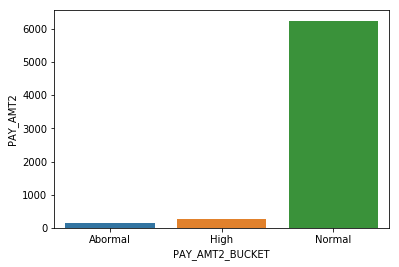

In [152]:
agg_dt = defaulters.groupby(by=['PAY_AMT2_BUCKET'])['PAY_AMT2'].count().reset_index()
sns.barplot(x='PAY_AMT2_BUCKET',y='PAY_AMT2', data=agg_dt )

<u> __Non-Defaulters:__

In [153]:
(non_defaulters['PAY_AMT2_BUCKET']).value_counts()/len(non_defaulters)*100

Normal    86.41
Abormal    6.88
High       6.71
Name: PAY_AMT2_BUCKET, dtype: float64

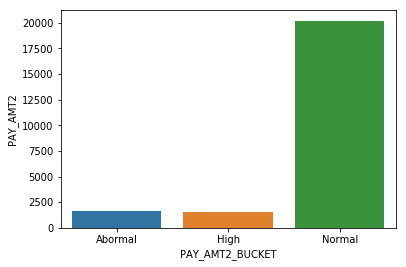

In [154]:
agg_dt = non_defaulters.groupby(by=['PAY_AMT2_BUCKET'])['PAY_AMT2'].count().reset_index()
sns.barplot(x='PAY_AMT2_BUCKET',y='PAY_AMT2', data=agg_dt )

Text(0.5, 0, 'Non-faulters')

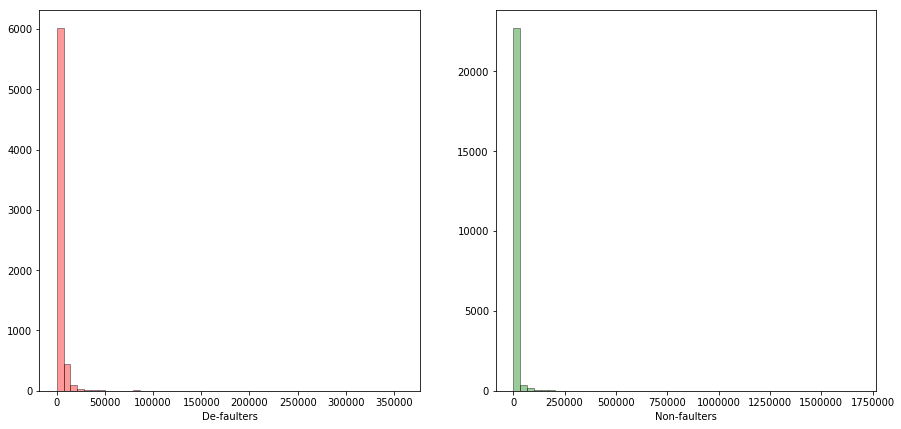

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,7))
sns.distplot(defaulters['PAY_AMT2'],bins=50, kde=False,color='red', hist_kws={'edgecolor':'black'},ax=ax[0])
ax[0].set_xlabel('De-faulters')
sns.distplot(non_defaulters['PAY_AMT2'],bins=50, kde=False,color='green', hist_kws={'edgecolor':'black'},ax=ax[1])
ax[1].set_xlabel('Non-faulters')

Text(0.5, 0, 'Non-faulters')

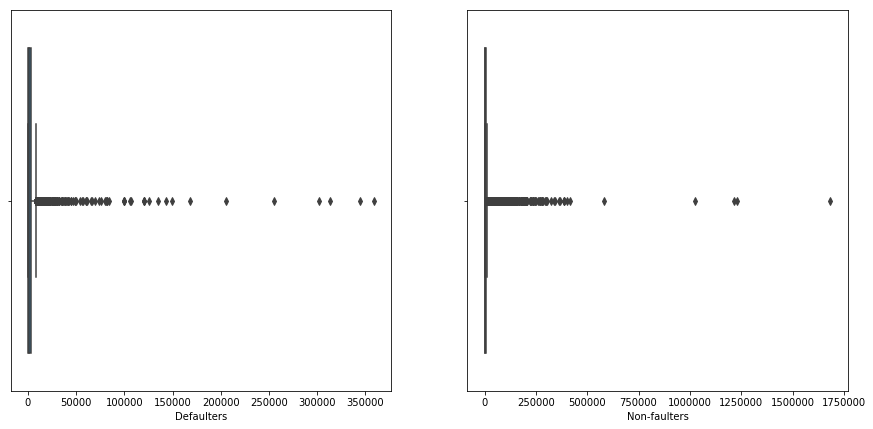

In [156]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,7))
sns.boxplot(x='PAY_AMT2',data=defaulters,ax=ax[0])
ax[0].set_xlabel('Defaulters')
sns.boxplot(x='PAY_AMT2',data=non_defaulters,ax=ax[1])
ax[1].set_xlabel('Non-faulters')

- **Payment for July 2005** 

1. What is the distribution?

In [157]:
dt['PAY_AMT3'].describe()

count    30000.00
mean      5225.68
std      17606.96
min          0.00
25%        390.00
50%       1800.00
75%       4505.00
max     896040.00
Name: PAY_AMT3, dtype: float64

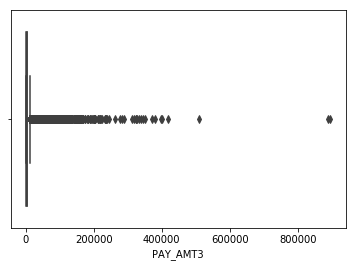

In [158]:
sns.boxplot(x='PAY_AMT3',data=dt)

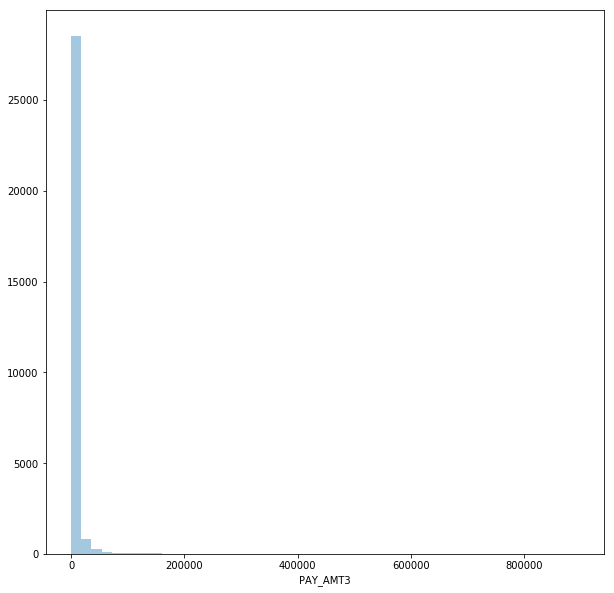

In [159]:
plt.figure(figsize=(10,10))
sns.distplot(dt['PAY_AMT3'], bins=50, kde=False)

2.What is the distribution in case of __defaulters__ and __non-defaulters__? 

<u>__De-faulters__:

In [160]:
defaulters['PAY_AMT3'].describe()

count     6636.00
mean      3367.35
std      12959.62
min          0.00
25%          0.00
50%       1222.00
75%       3000.00
max     508229.00
Name: PAY_AMT3, dtype: float64

<u>__Non-defaulters__:

In [161]:
pd.options.display.float_format = '{:.2f}'.format

In [162]:
non_defaulters['PAY_AMT3'].describe()

count    23364.00
mean      5753.50
std      18684.26
min          0.00
25%        600.00
50%       2000.00
75%       5000.00
max     896040.00
Name: PAY_AMT3, dtype: float64

<u> Boxplots:

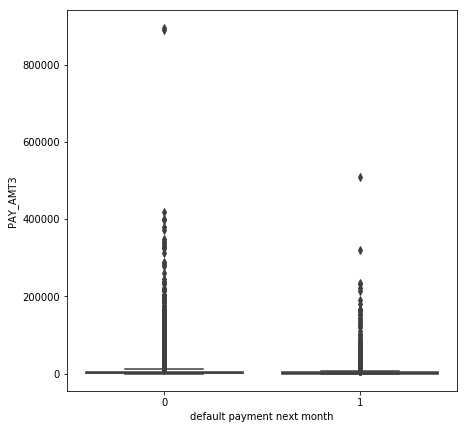

In [163]:
plt.figure(figsize=(7,7))
sns.boxplot(x='default payment next month', y='PAY_AMT3', data=dt)

<u> Histogram:

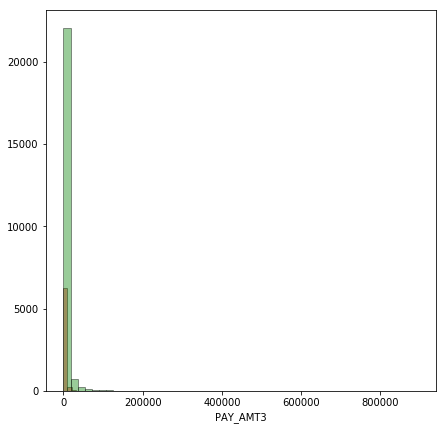

In [164]:
plt.figure(figsize=(7,7))
sns.distplot(defaulters['PAY_AMT3'],bins=50, kde=False,color='red', hist_kws={'edgecolor':'black'})
sns.distplot(non_defaulters['PAY_AMT3'],bins=50, kde=False,color='green', hist_kws={'edgecolor':'black'})

<u> Kernal Density:

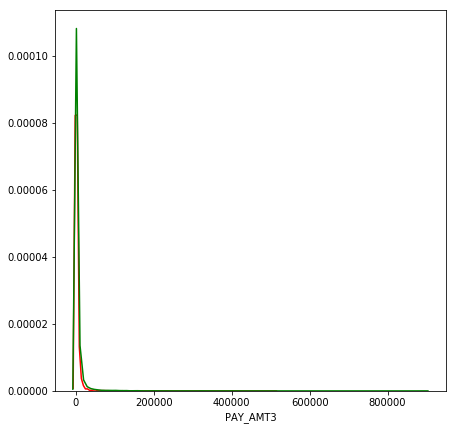

In [165]:
plt.figure(figsize=(7,7))
sns.distplot(defaulters['PAY_AMT3'],bins=50, kde=True,hist=False,color='red')
sns.distplot(non_defaulters['PAY_AMT3'],bins=50, kde=True,hist=False,color='green')

<u> Bucket analysis:

In [166]:
dt['PAY_AMT3_BUCKET']= np.where((dt['PAY_AMT3'] >-1) & (dt['PAY_AMT3'] <10000),'Normal',
                       np.where((dt['PAY_AMT3'] > 10000) & (dt['PAY_AMT3'] <20000),'High','Abormal'))         
defaulters['PAY_AMT3_BUCKET']= np.where((defaulters['PAY_AMT3'] >-1) & (defaulters['PAY_AMT3'] <10000),'Normal',
                       np.where((defaulters['PAY_AMT3'] > 10000) & (defaulters['PAY_AMT3'] <20000),'High','Abormal'))         
non_defaulters['PAY_AMT3_BUCKET']= np.where((non_defaulters['PAY_AMT3'] >-1) & (non_defaulters['PAY_AMT3'] <10000),'Normal',
                       np.where((non_defaulters['PAY_AMT3'] > 10000) & (non_defaulters['PAY_AMT3'] <20000),'High','Abormal'))         

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [167]:
(dt['PAY_AMT3_BUCKET']).value_counts()/len(dt)*100

Normal    89.38
Abormal    5.50
High       5.12
Name: PAY_AMT3_BUCKET, dtype: float64

<u> __Complete data:__

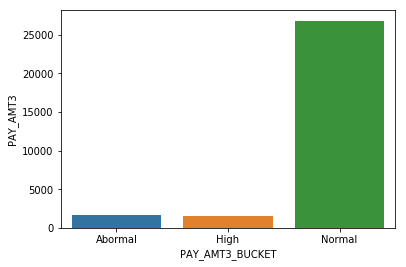

In [168]:
agg_dt = dt.groupby(by=['PAY_AMT3_BUCKET'])['PAY_AMT3'].count().reset_index()
sns.barplot(x='PAY_AMT3_BUCKET',y='PAY_AMT3', data=agg_dt )

<u> __Defaulters:__

In [169]:
(defaulters['PAY_AMT3_BUCKET']).value_counts()/len(defaulters)*100

Normal    94.00
High       3.59
Abormal    2.41
Name: PAY_AMT3_BUCKET, dtype: float64

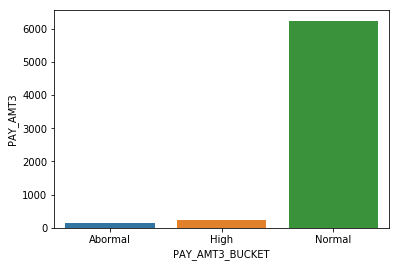

In [170]:
agg_dt = defaulters.groupby(by=['PAY_AMT3_BUCKET'])['PAY_AMT3'].count().reset_index()
sns.barplot(x='PAY_AMT3_BUCKET',y='PAY_AMT3', data=agg_dt )

<u> __Non-Defaulters:__

In [171]:
(non_defaulters['PAY_AMT3_BUCKET']).value_counts()/len(non_defaulters)*100

Normal    88.07
Abormal    6.38
High       5.55
Name: PAY_AMT3_BUCKET, dtype: float64

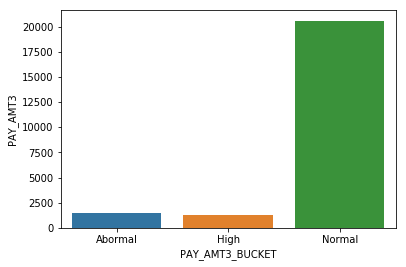

In [172]:
agg_dt = non_defaulters.groupby(by=['PAY_AMT3_BUCKET'])['PAY_AMT3'].count().reset_index()
sns.barplot(x='PAY_AMT3_BUCKET',y='PAY_AMT3', data=agg_dt )

Text(0.5, 0, 'Non-faulters')

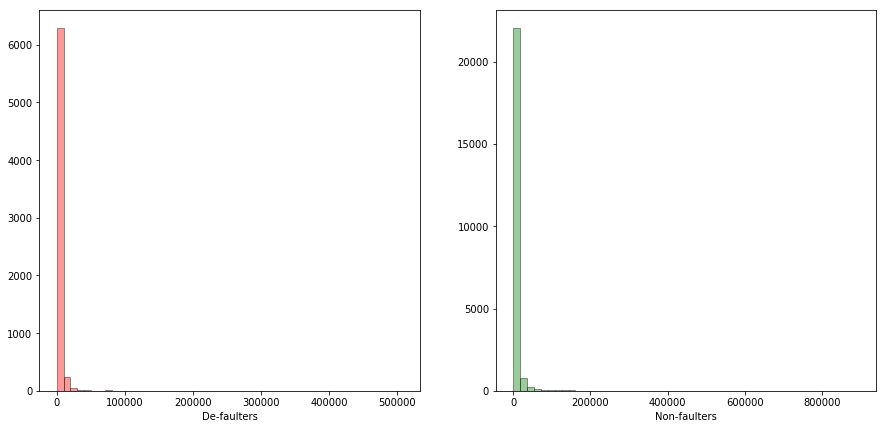

In [173]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,7))
sns.distplot(defaulters['PAY_AMT3'],bins=50, kde=False,color='red', hist_kws={'edgecolor':'black'},ax=ax[0])
ax[0].set_xlabel('De-faulters')
sns.distplot(non_defaulters['PAY_AMT3'],bins=50, kde=False,color='green', hist_kws={'edgecolor':'black'},ax=ax[1])
ax[1].set_xlabel('Non-faulters')

Text(0.5, 0, 'Non-faulters')

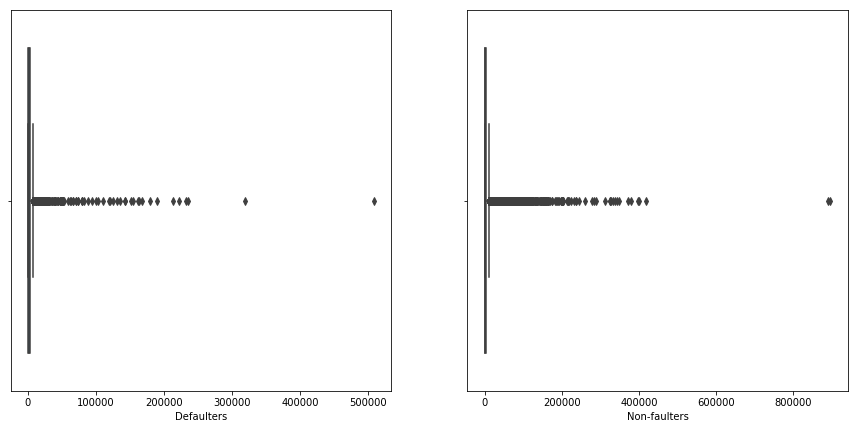

In [174]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,7))
sns.boxplot(x='PAY_AMT3',data=defaulters,ax=ax[0])
ax[0].set_xlabel('Defaulters')
sns.boxplot(x='PAY_AMT3',data=non_defaulters,ax=ax[1])
ax[1].set_xlabel('Non-faulters')

__Information__: The above charts for  __Pay Amount__ shows that in case of __defaulters__ the __normal payments__ make up about more than __90%__ of the data whereas, there is only __3-4%__ of __abnormal payments__. In case of __non-defaulters__ it __normal payments__ are about more or less __86%__ of the data whereas, the __abnormal payments__ are about __6-7%__ of the data. The feature set of __Pay Amount__ doesn't have clear distinction between the __defaulters and __non-defaulter__. 

- **Gender** 

1. What is the gender ratio in complete dataset? 1-> Male and 2-> Female

In [175]:
frequency_gender_tbl = pd.crosstab(dt['SEX'],'frequency').reset_index()

In [176]:
frequency_gender_tbl

col_0,SEX,frequency
0,1,11888
1,2,18112


/home/sehan/.local/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


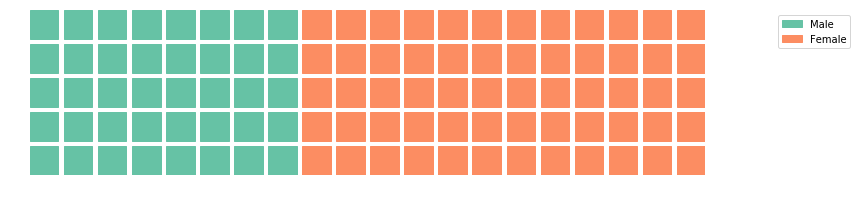

In [177]:
data = {'Male': 11888, 'Female': 18112}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=20, 
    values=data,
    figsize=(12,12),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

2. Is there any **visual impact** on the gender ratio for **defaulters** and **Non-defaulters**? 

_Defaulters_:

In [178]:
frequency_df_gender_tbl = pd.crosstab(defaulters['SEX'],'frequency').reset_index()
frequency_df_gender_tbl

col_0,SEX,frequency
0,1,2873
1,2,3763


/home/sehan/.local/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


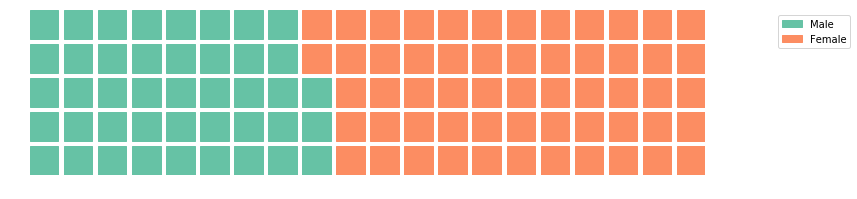

In [179]:
data = {'Male': 2873, 'Female': 3763}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=20, 
    values=data,
    figsize=(12,12),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

_Non-Defaulters_:

In [180]:
frequency_nondf_gender_tbl = pd.crosstab(non_defaulters['SEX'],'frequency').reset_index()

/home/sehan/.local/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


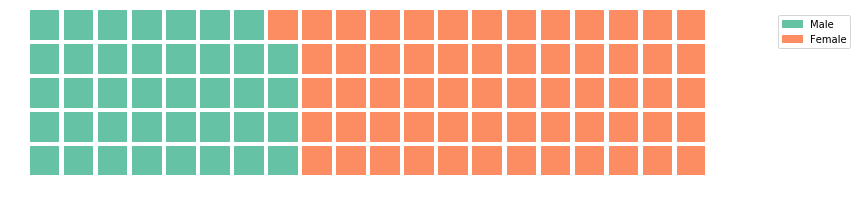

In [181]:
data = {'Male': 9015, 'Female': 14349}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=20, 
    values=data,
    figsize=(12,12),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

**Information**: There feature __gender__ doesn't has any predictive power. 

- **MARRIAGE** 

1. What is the marriage ratio in complete dataset? (1 = married; 2 = single; 3 = others)

In [182]:
frequency_marriage_tbl = pd.crosstab(dt['MARRIAGE'],'frequency').reset_index()

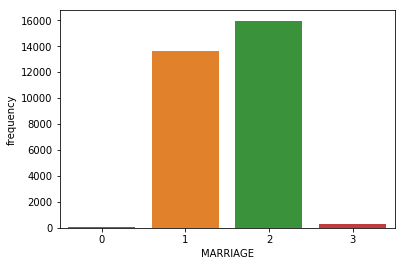

In [188]:
sns.barplot(x='MARRIAGE', y='frequency',data=frequency_marriage_tbl)

2. Is there any **visual impact** in marraige ratio for **defaulters** and **non-defaulters**?

_Defaulters_:

In [185]:
frequency_df_marriage_tbl = pd.crosstab(defaulters['MARRIAGE'],'frequency').reset_index()

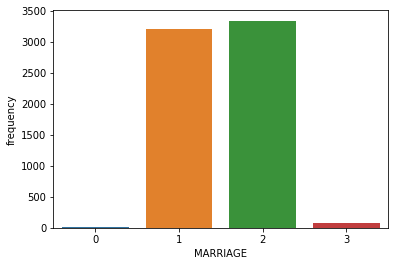

In [190]:
sns.barplot(x='MARRIAGE', y='frequency',data=frequency_df_marriage_tbl)

_Non-Defaulters_:

In [191]:
frequency_nondf_marriage_tbl = pd.crosstab(non_defaulters['MARRIAGE'],'frequency').reset_index()

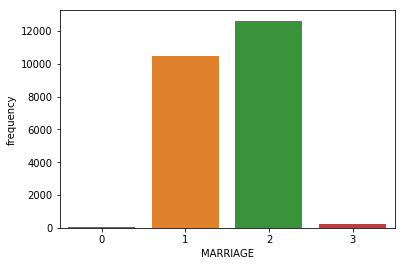

In [192]:
sns.barplot(x='MARRIAGE', y='frequency',data=frequency_nondf_marriage_tbl)

**Information**: There feature __Marriage__ doesn't has any predictive power. 

- **AGE**

1. What is the Age distribution in complete dataset?

In [193]:
age = dt['AGE']

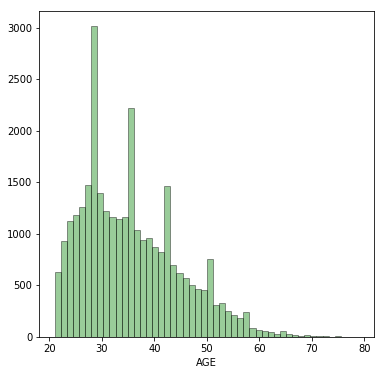

In [195]:
plt.figure(figsize=(6,6))
sns.distplot(age,hist=True,kde=False, color='Green',bins=50, hist_kws={'edgecolor':'black'})

2. Is there any **Visual impact** on the distribution of Age for **defaulters** and **non-defaulters**?

_Defaulters_ and _Non-Defaulter_:

In [203]:
non_defaulter_age = non_defaulters['AGE']
defaulter_age = defaulters['AGE']

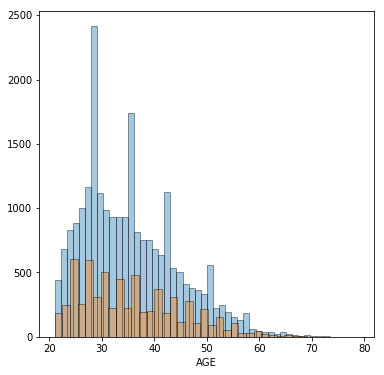

In [204]:
plt.figure(figsize=(6,6))
sns.distplot(non_defaulter_age, hist=True, kde=False, hist_kws={'edgecolor':'black'})
sns.distplot(defaulter_age, hist=True, kde=False, hist_kws={'edgecolor':'black'})

### Multivariate Analysis

1. What is the relationship between **Amount of bill** and **Payment history** for complete dataset?

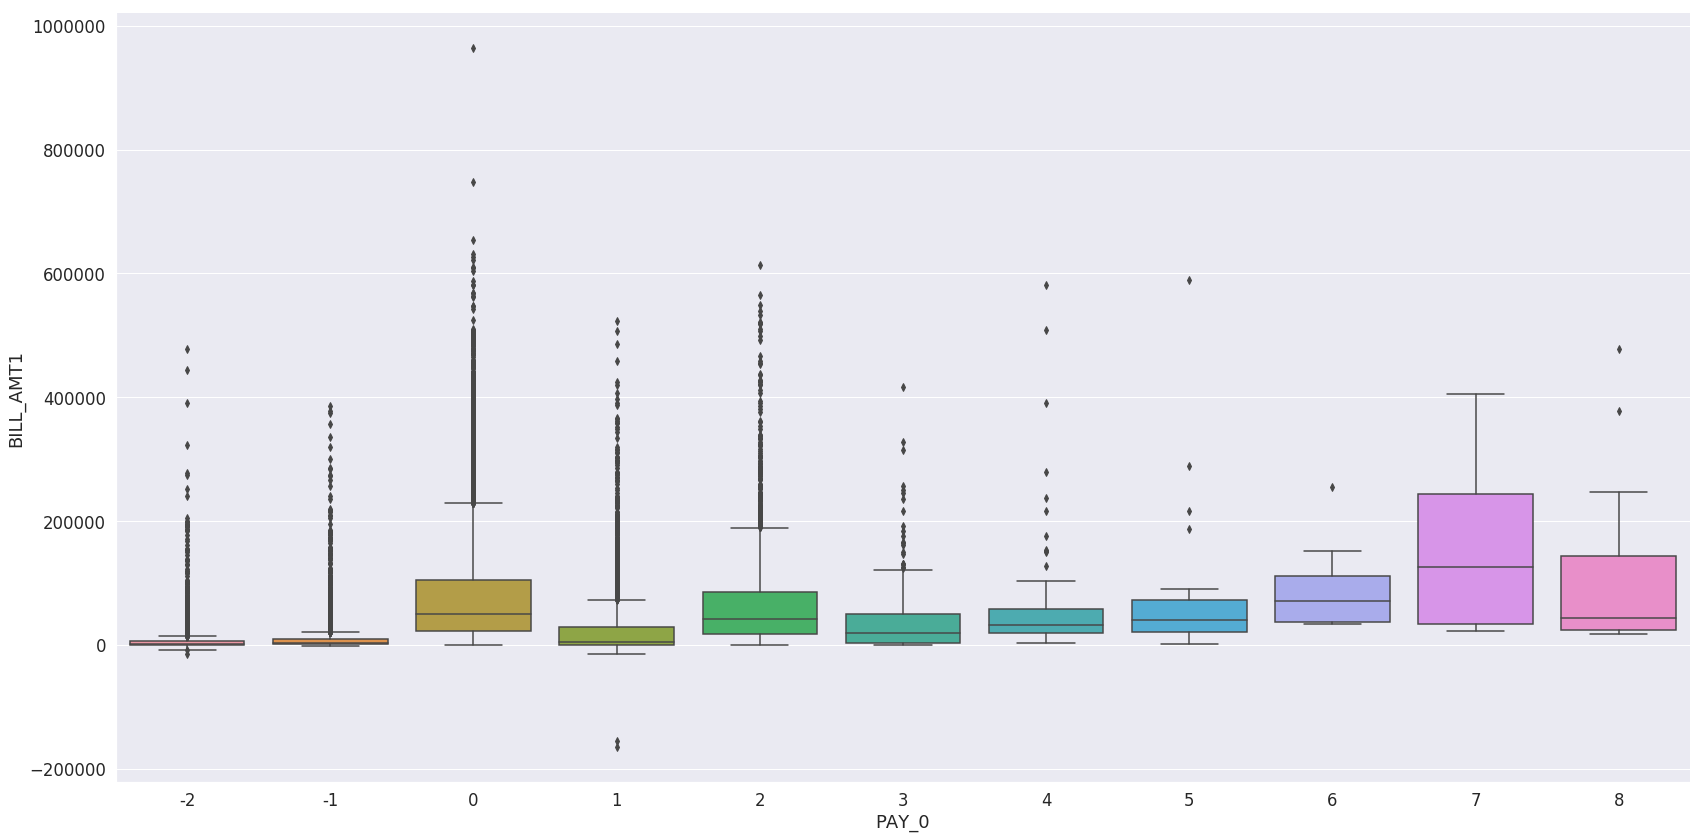

In [48]:
sns.set(font_scale=1.5)
sns.catplot(x='PAY_0', y='BILL_AMT1', data=dt, kind="box", height=12, aspect=2,)

__Information__: It can be observed as the average bill amount is more than usual whenever payment is delayed. 

2. Is there any difference between the **Amount of bill distribution** for **Defaulters** and **Non-Defaulters**?

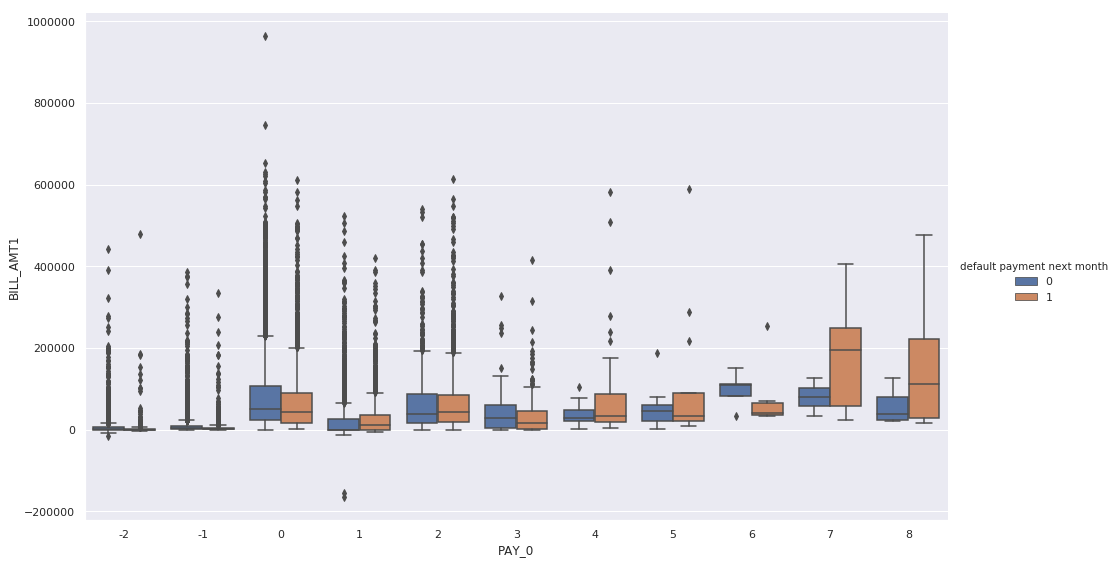

In [216]:
sns.set(font_scale=1)
sns.catplot(x='PAY_0', y='BILL_AMT1',hue='default payment next month', data=dt, kind="box", height=8, aspect=1.7)

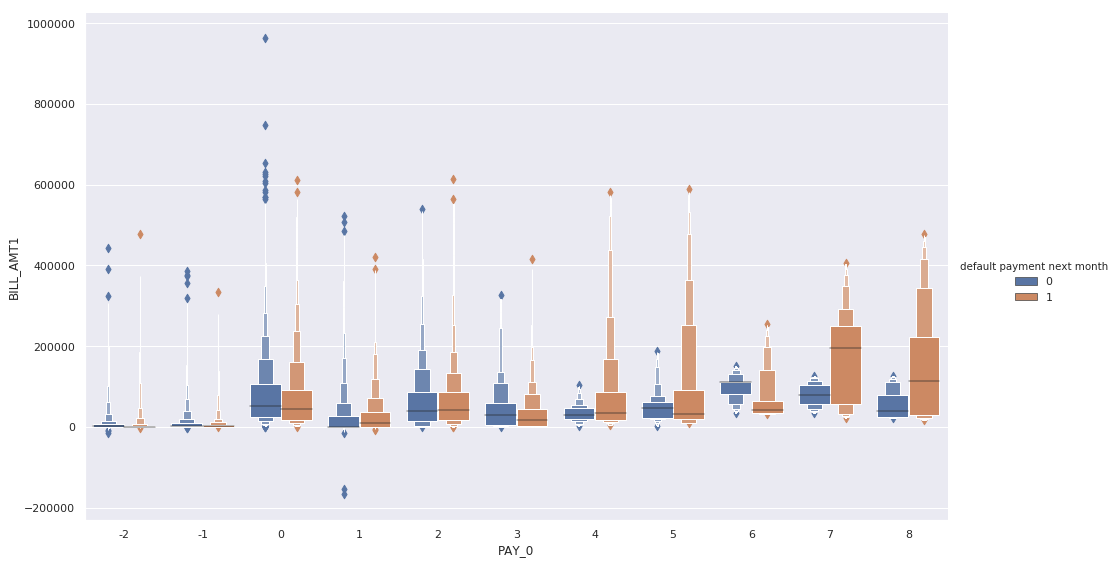

In [217]:
sns.set(font_scale=1)
sns.catplot(x='PAY_0', y='BILL_AMT1',hue='default payment next month', data=dt, kind="boxen", height=8, aspect=1.7)

<Figure size 576x1080 with 0 Axes>

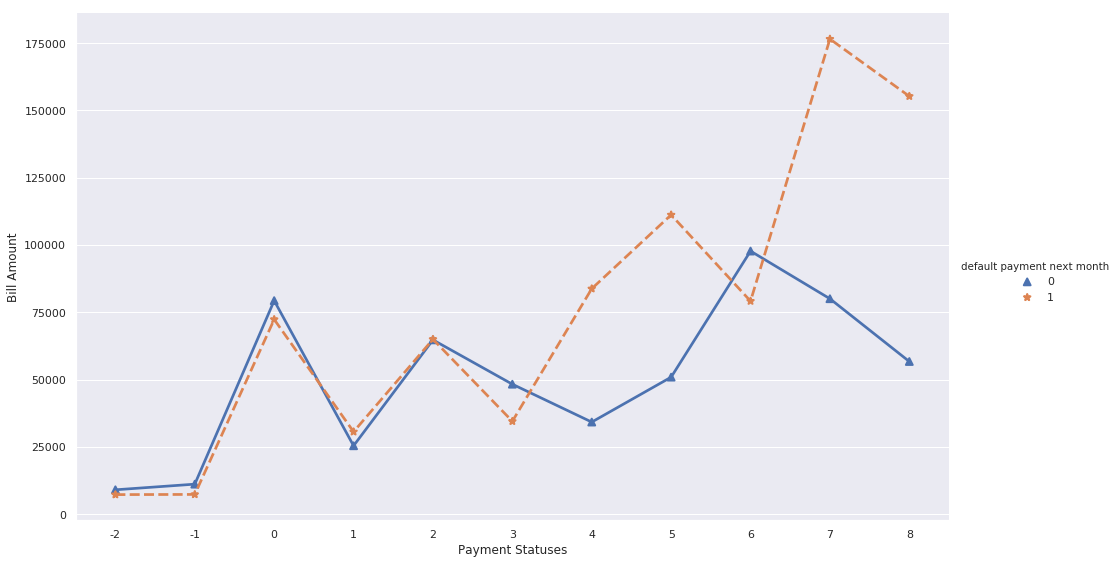

In [54]:
plt.figure(figsize=(8,15))
sns.set(font_scale=1)
ax = sns.catplot(x='PAY_0', y='BILL_AMT1',hue='default payment next month', data=dt, kind="point", 
            markers=['^','*'],  linestyles=["-", "--"],ci=False,
            height=8, aspect=1.7)
ax.set(xlabel='Payment Statuses', ylabel='Bill Amount')
ax.savefig('Vis2.png')

__Information__: As with __defaulters__ when payment is delayed the bill amount is usually abnormal which maybe the indication of fraud whereas, __non-defaulters__ having late payment still have normal bill amounts.

In [205]:
dt['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64